In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('C:\\Users\\megha\\Downloads\\Market_Basket_Optimisation.csv')

In [3]:
df_describe = df.describe(include='object')
print(df.info())

print(print(df.isnull().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [4]:
EDA = df.describe(include='object')
print('-----EDA----')
print(EDA)

-----EDA----
               shrimp        almonds        avocado vegetables mix  \
count            7500           5746           4388           3344   
unique            115            117            115            114   
top     mineral water  mineral water  mineral water  mineral water   
freq              577            484            375            201   

       green grapes whole weat flour       yams cottage cheese energy drink  \
count          2528             1863       1368            980          653   
unique          110              106        102             98           88   
top       green tea     french fries  green tea      green tea    green tea   
freq            153              107         96             67           57   

       tomato juice  low fat yogurt  green tea      honey      salad  \
count           394             255        153         86         46   
unique           80              66         50         42         28   
top       green tea  low

C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


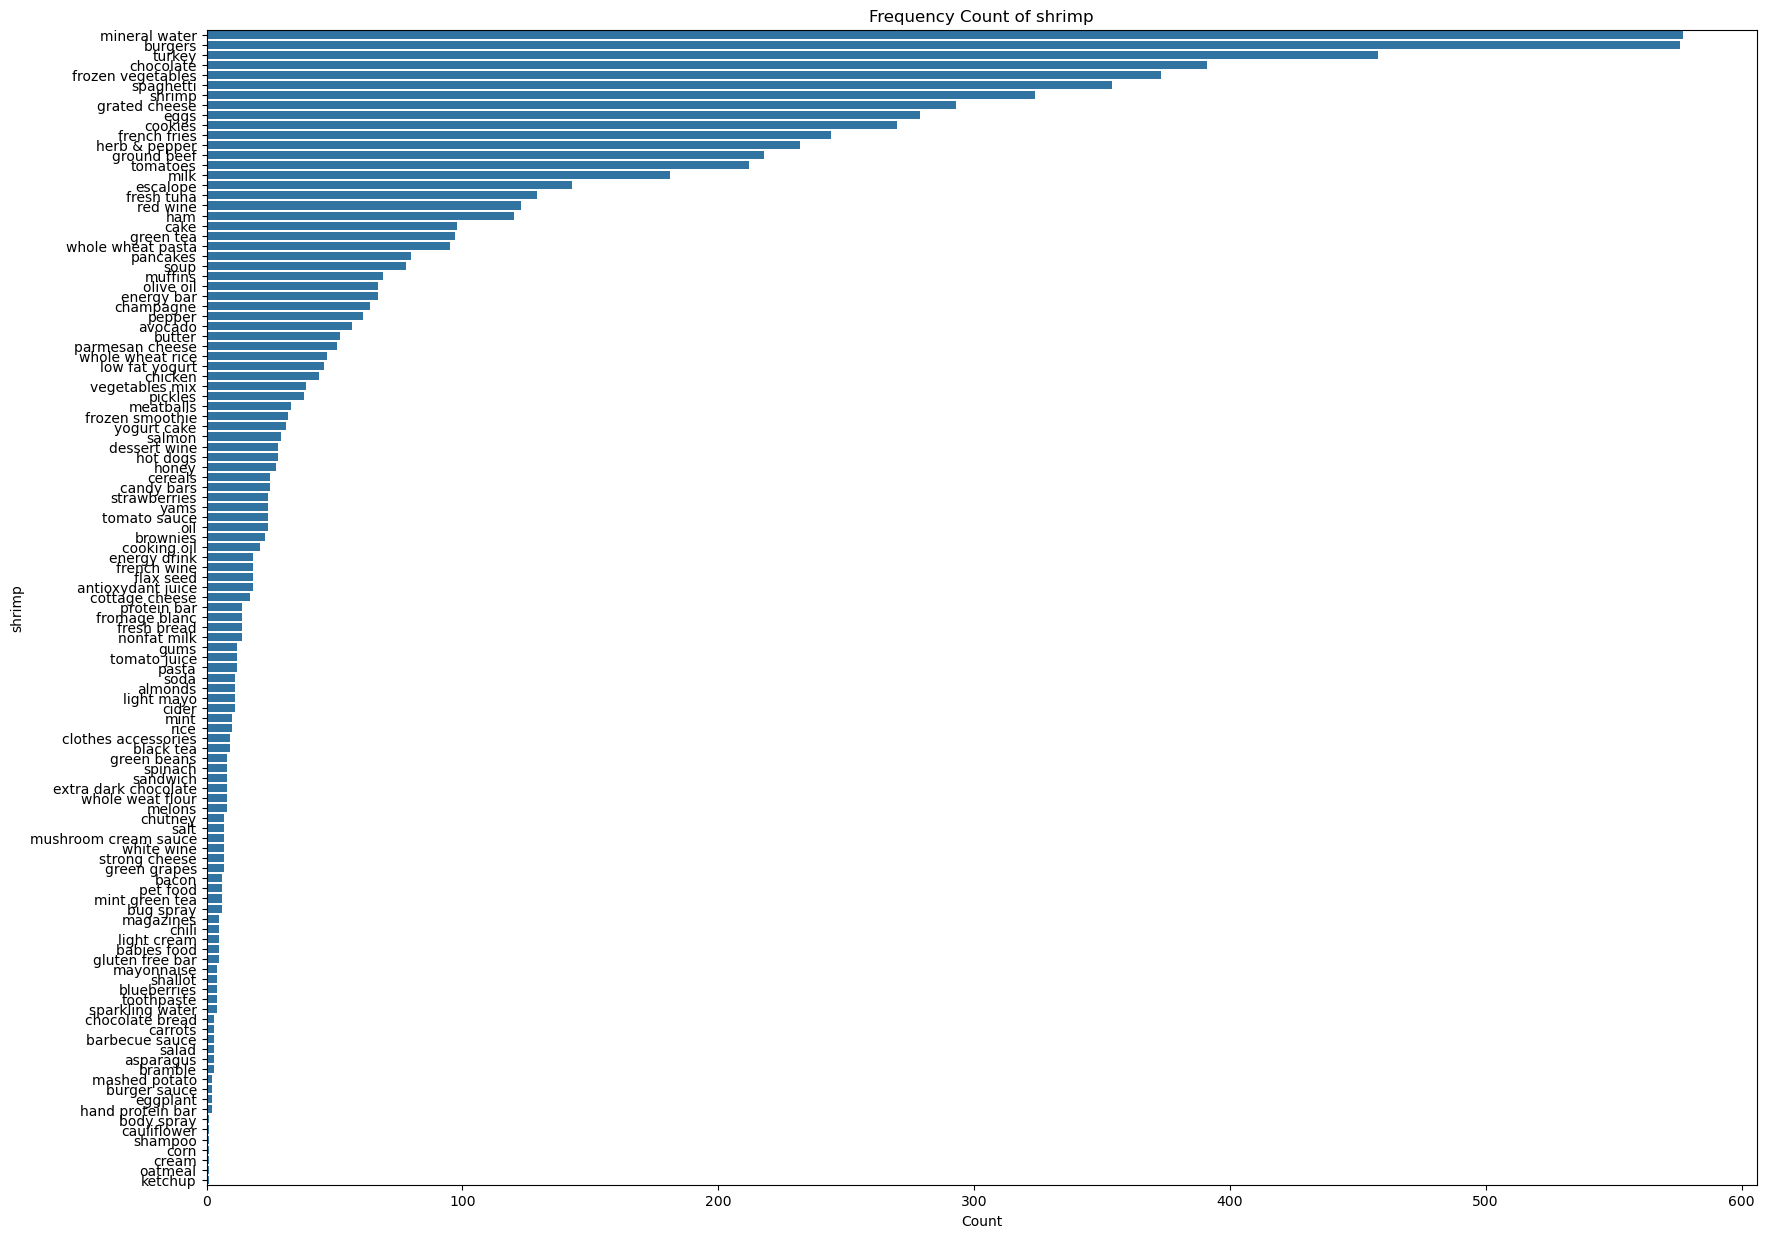

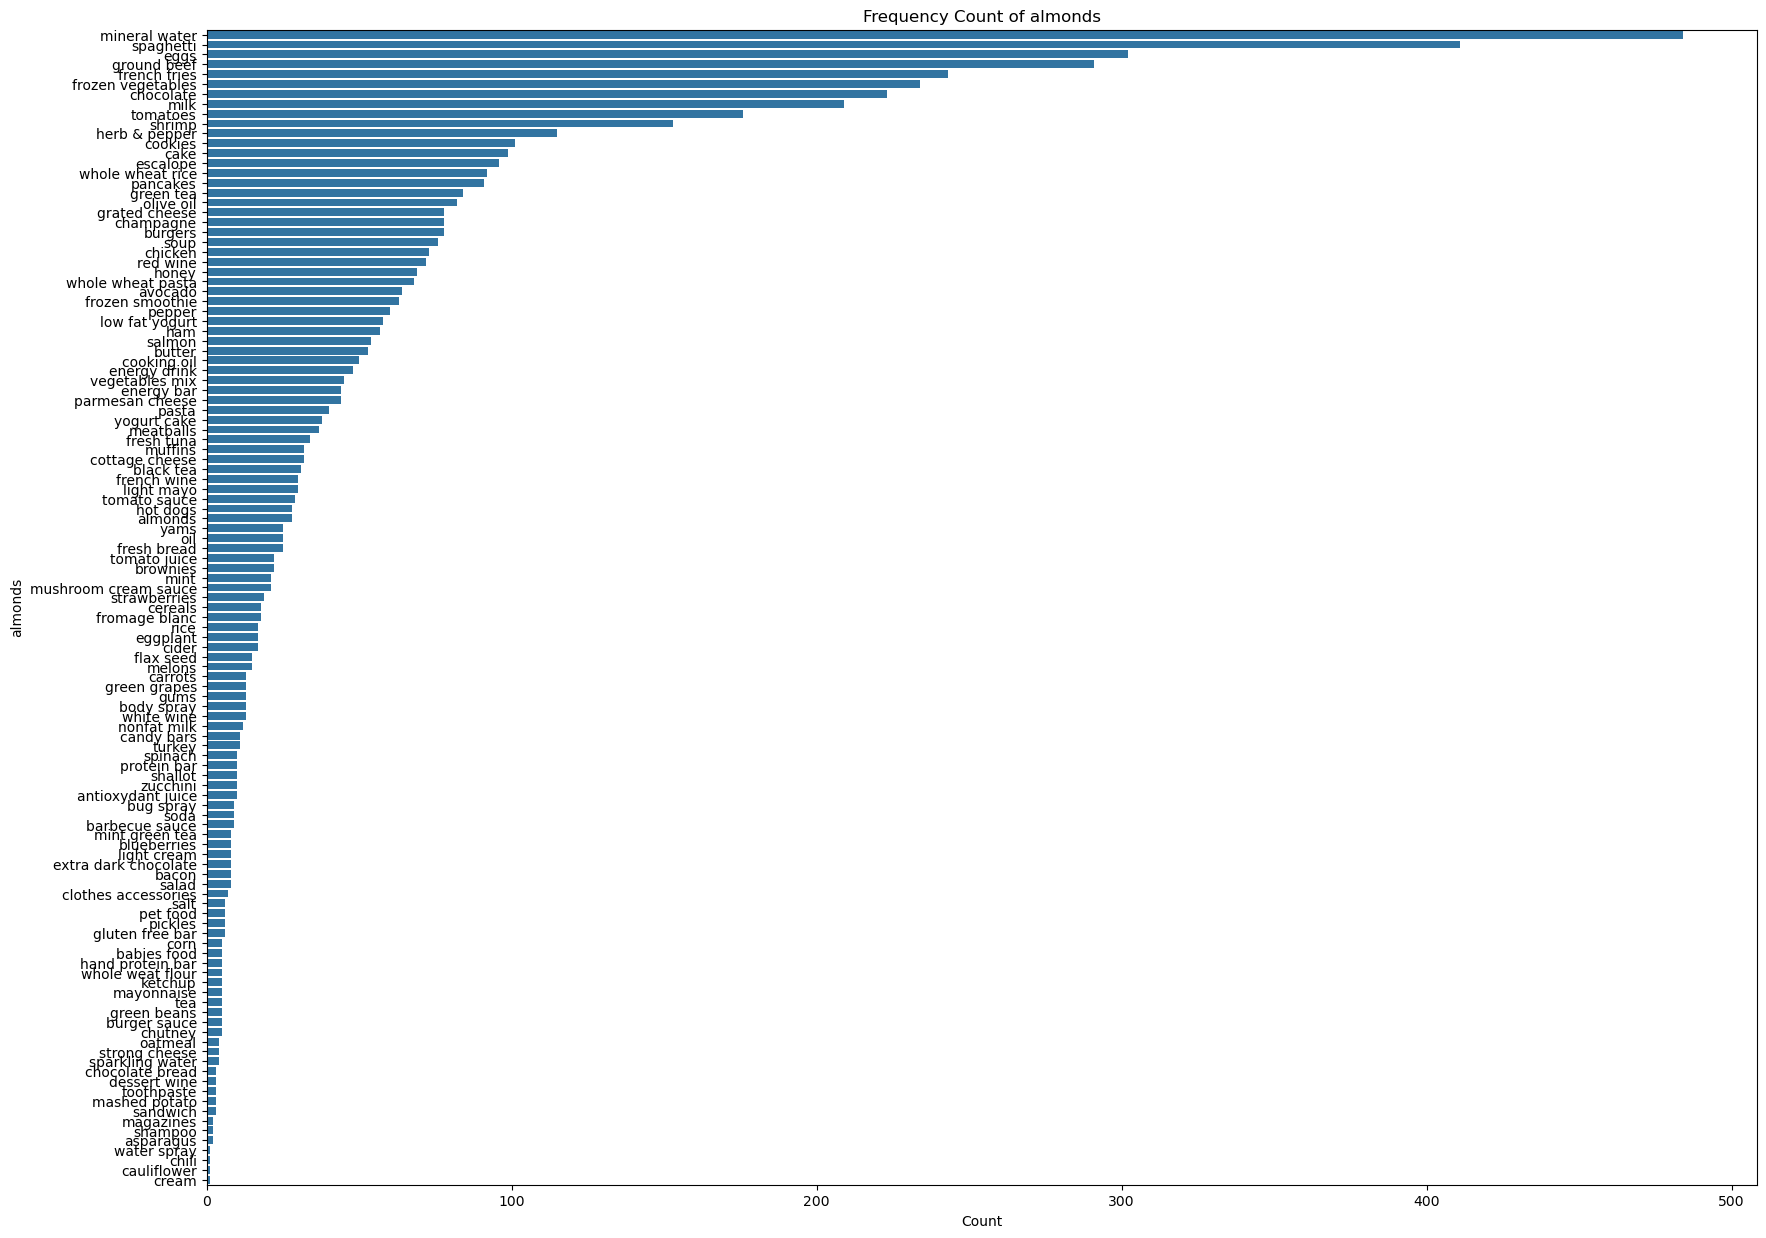

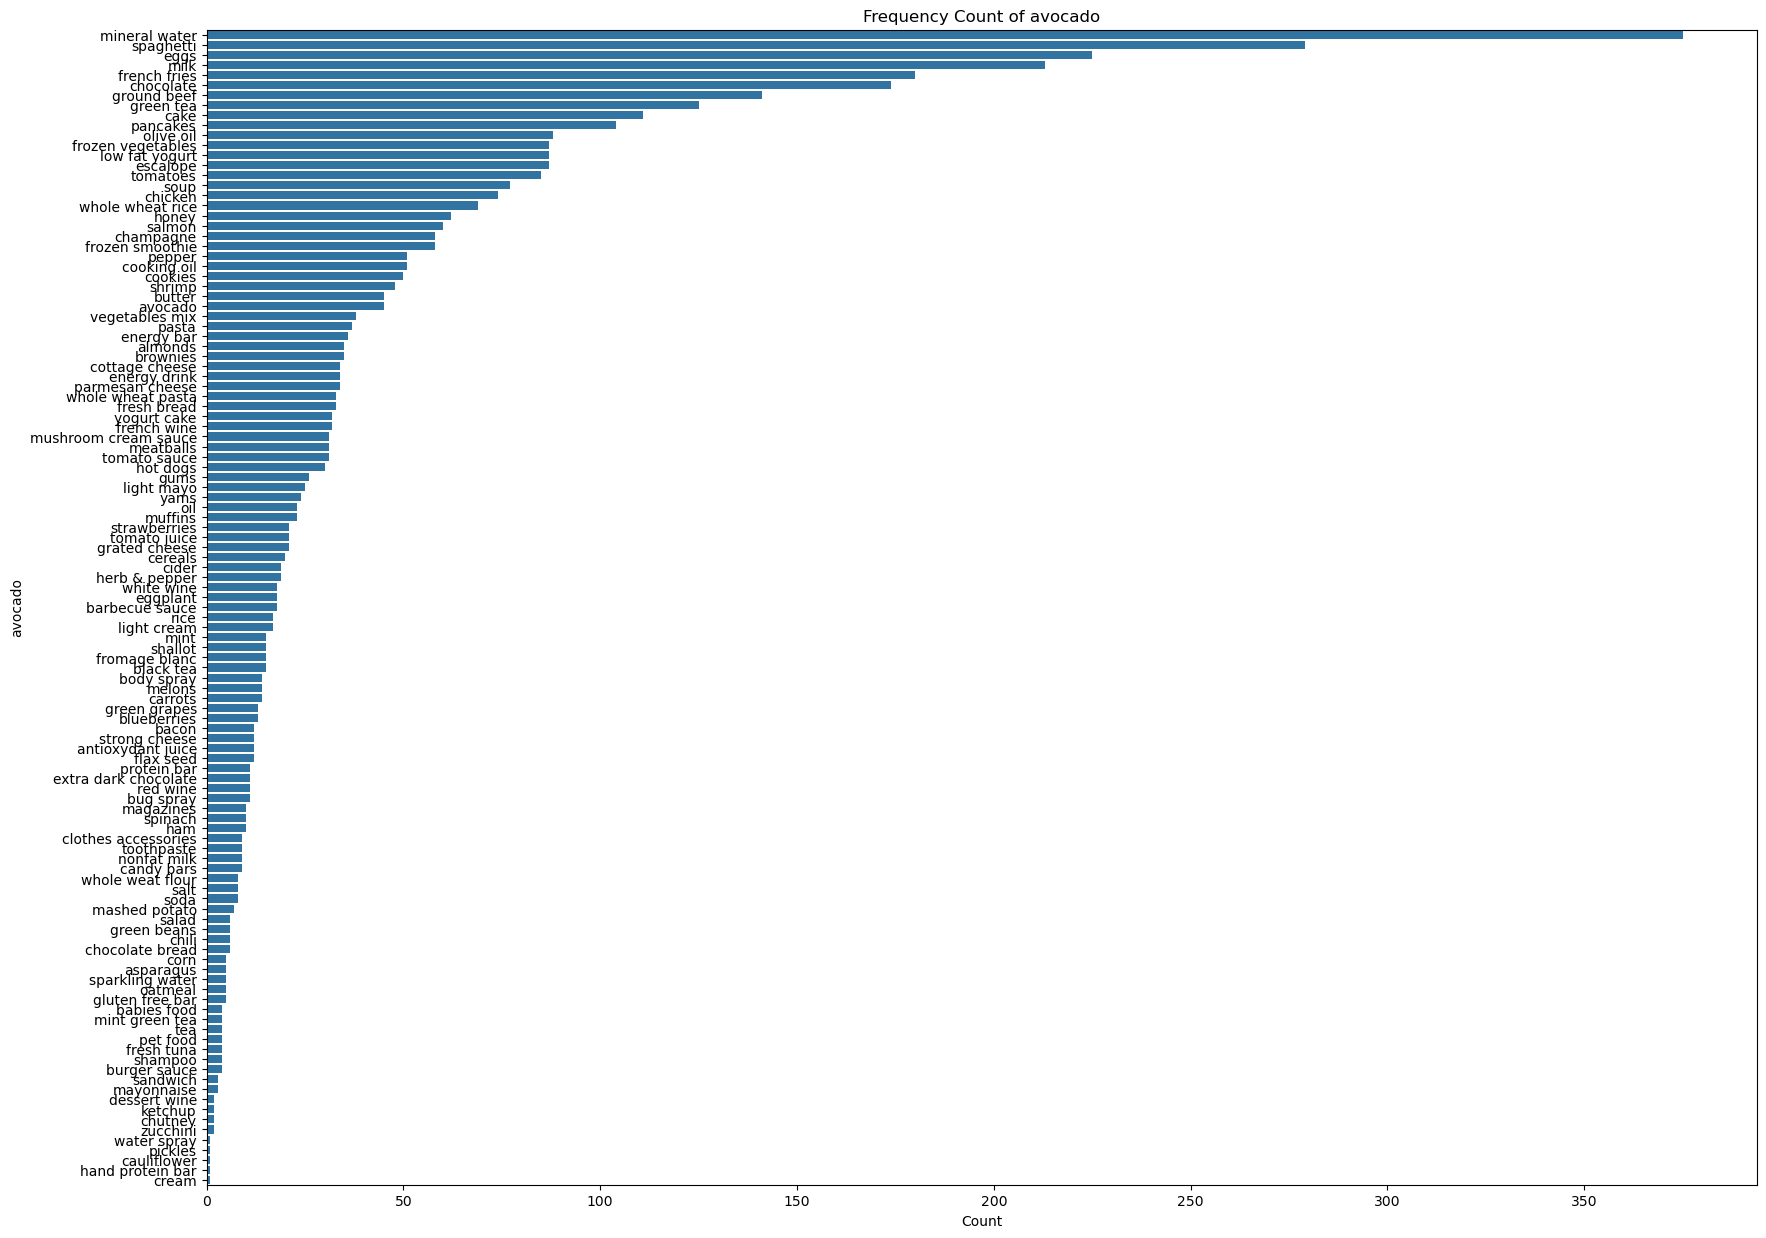

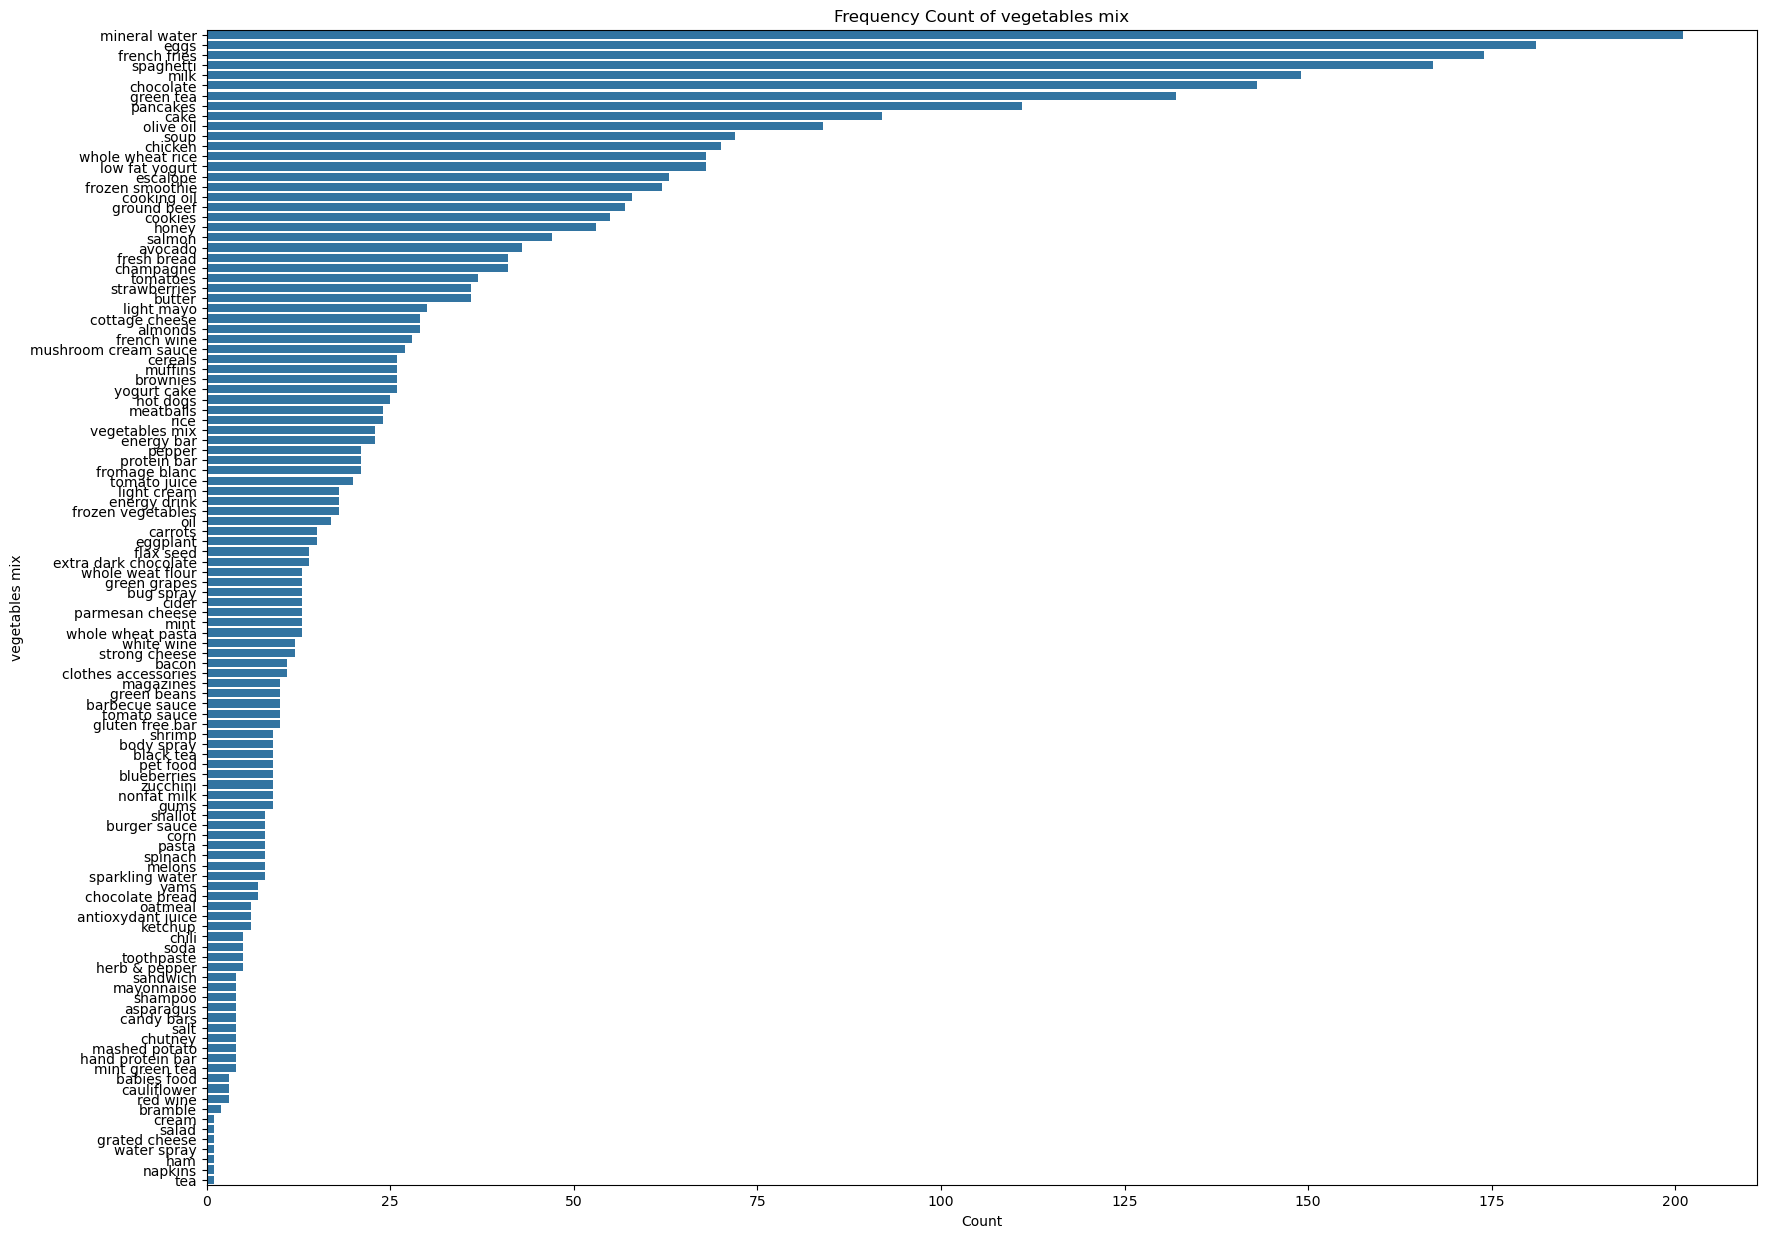

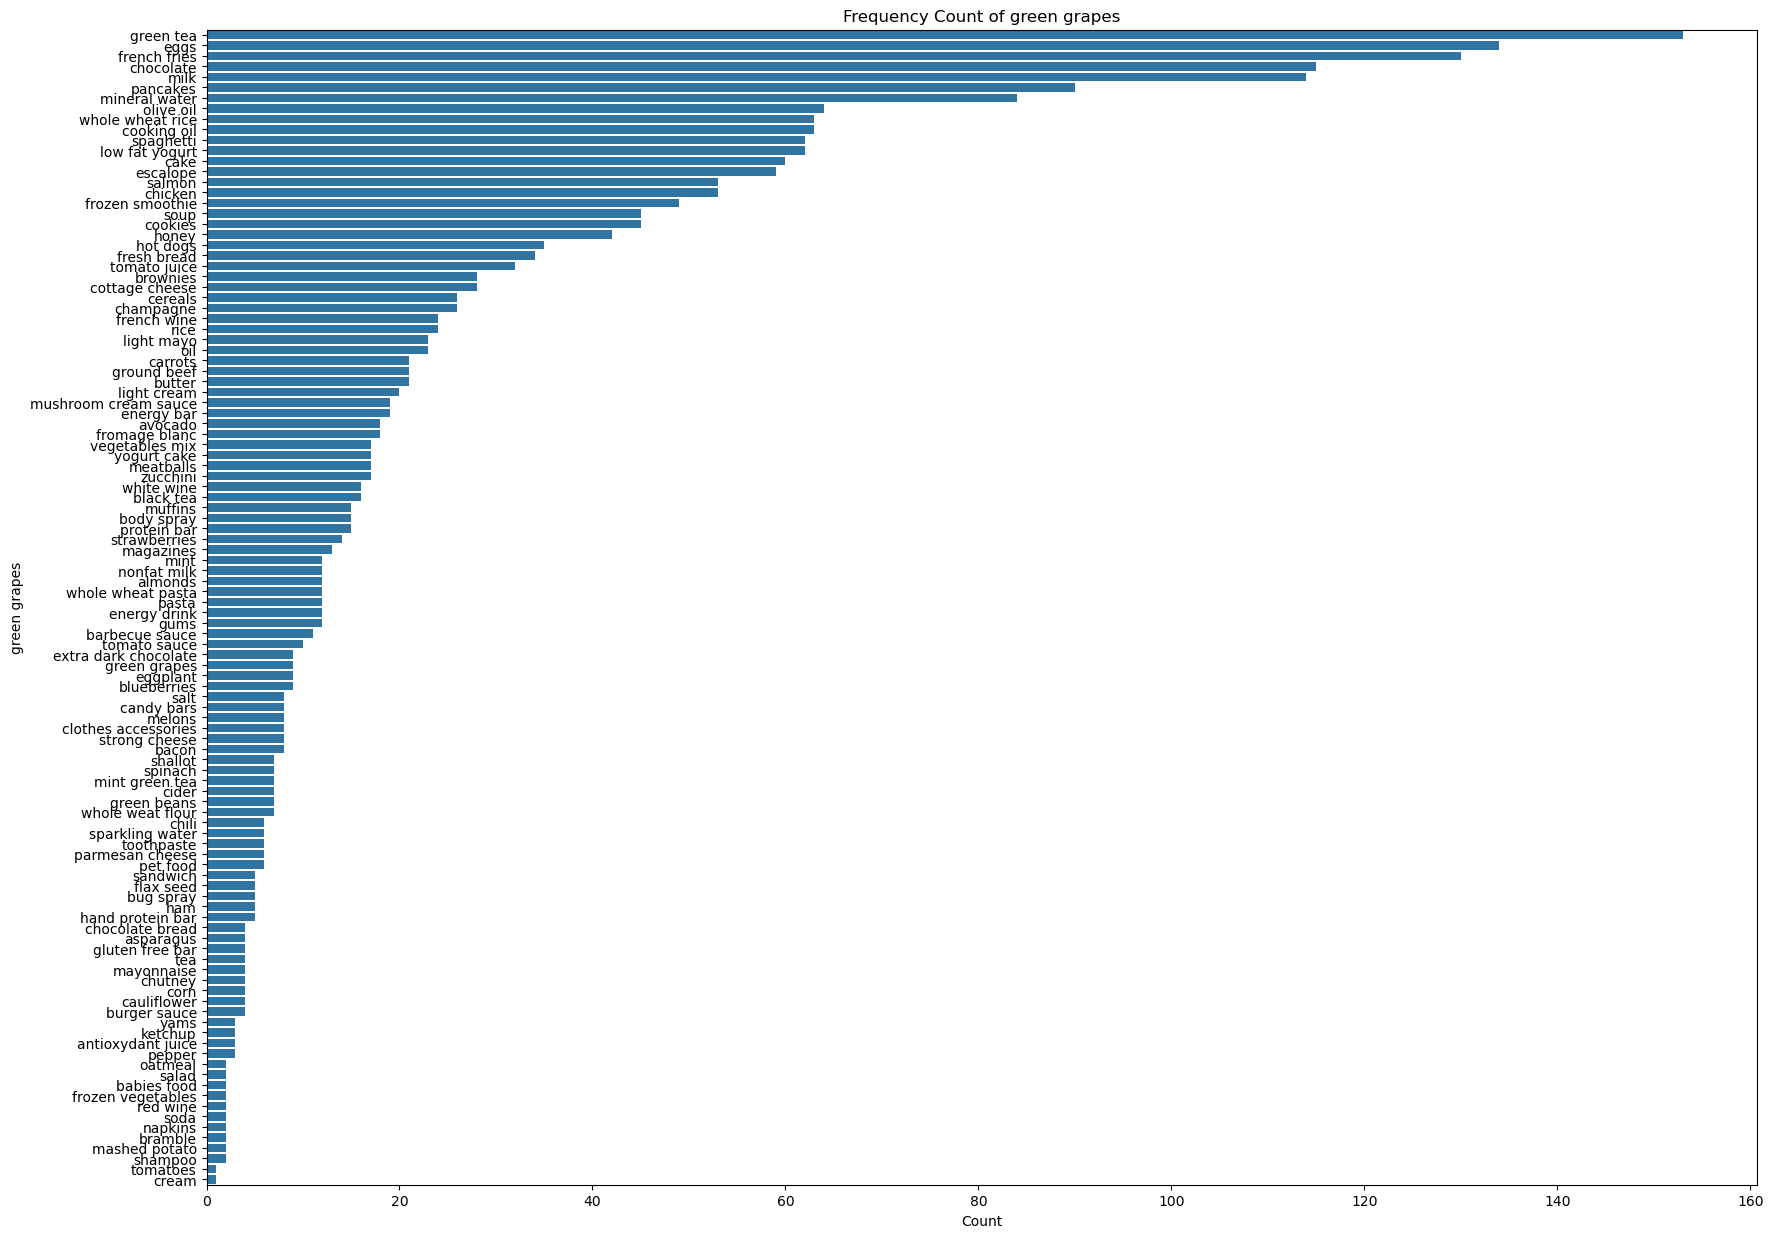

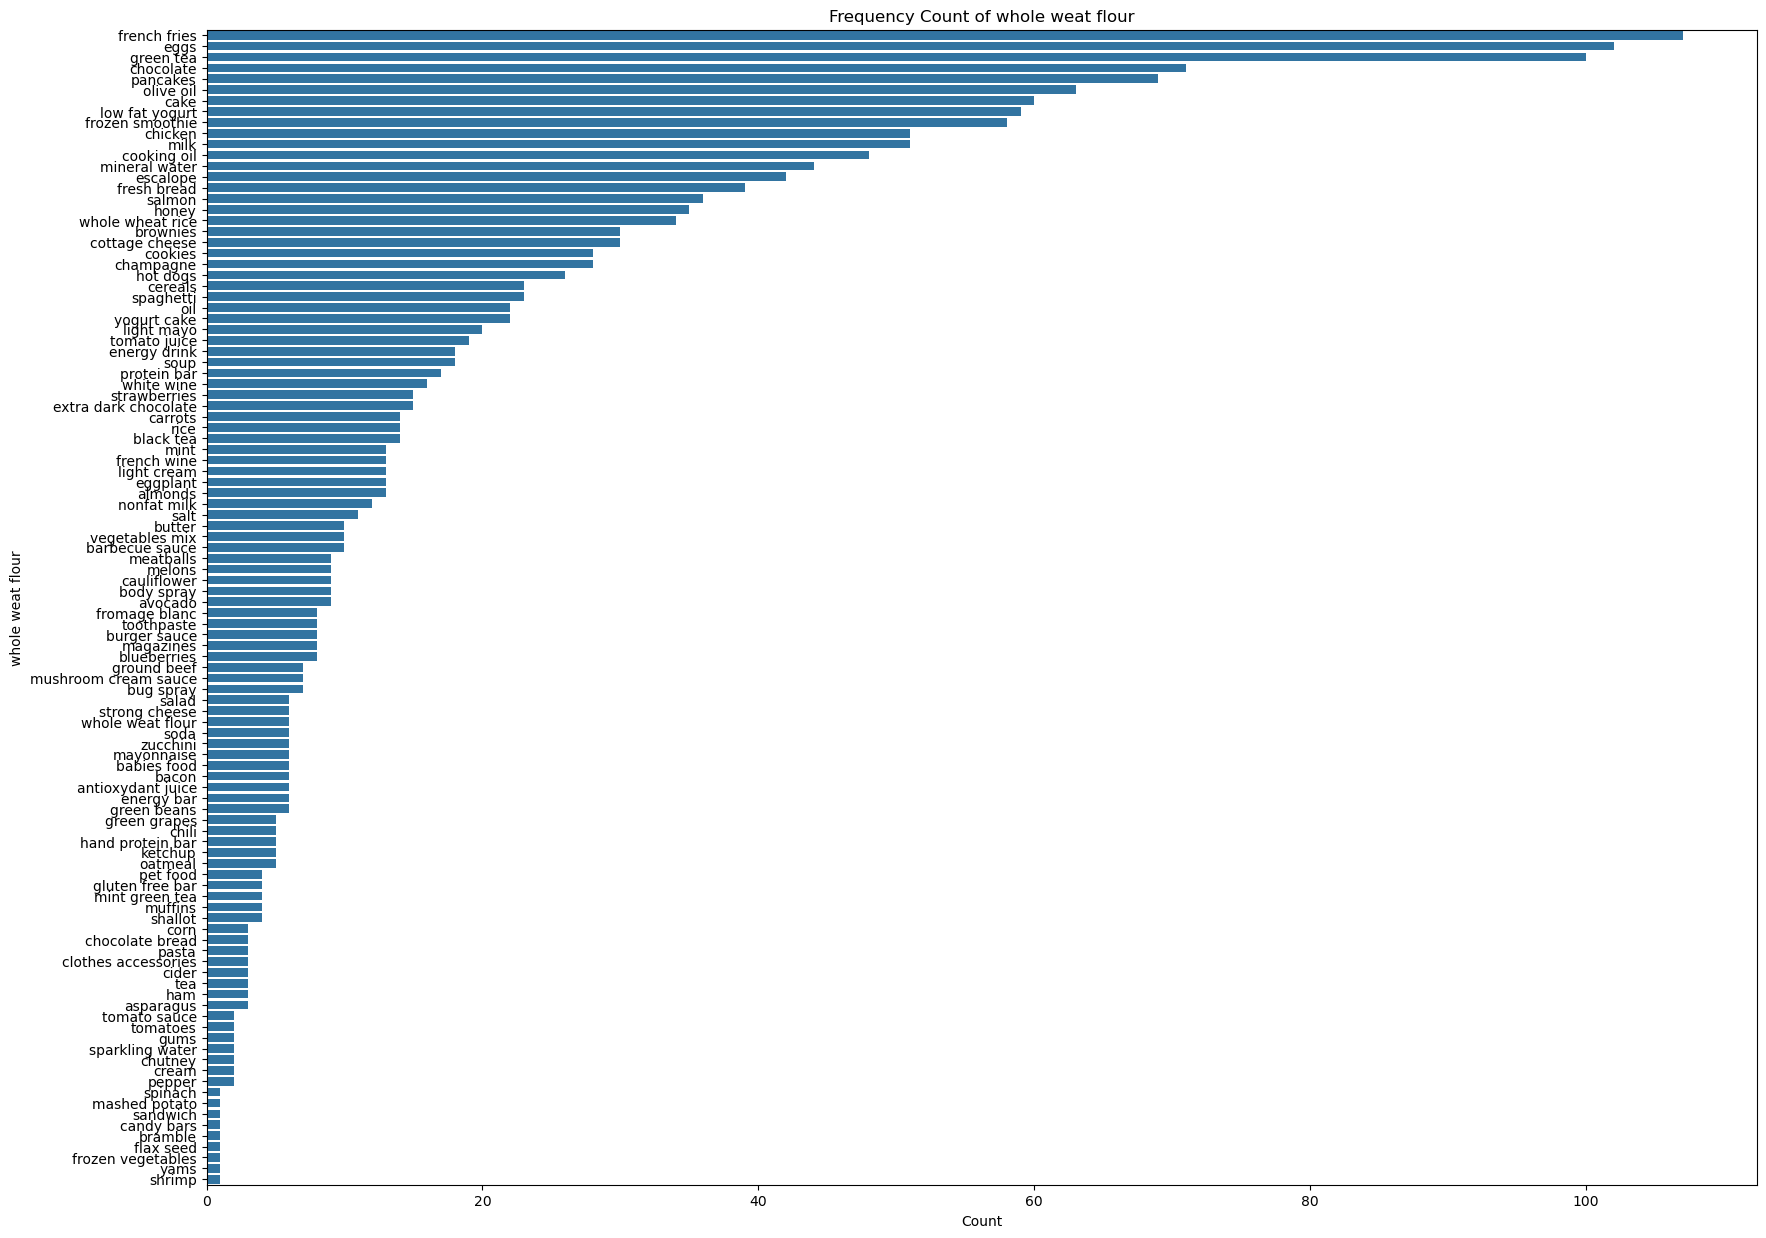

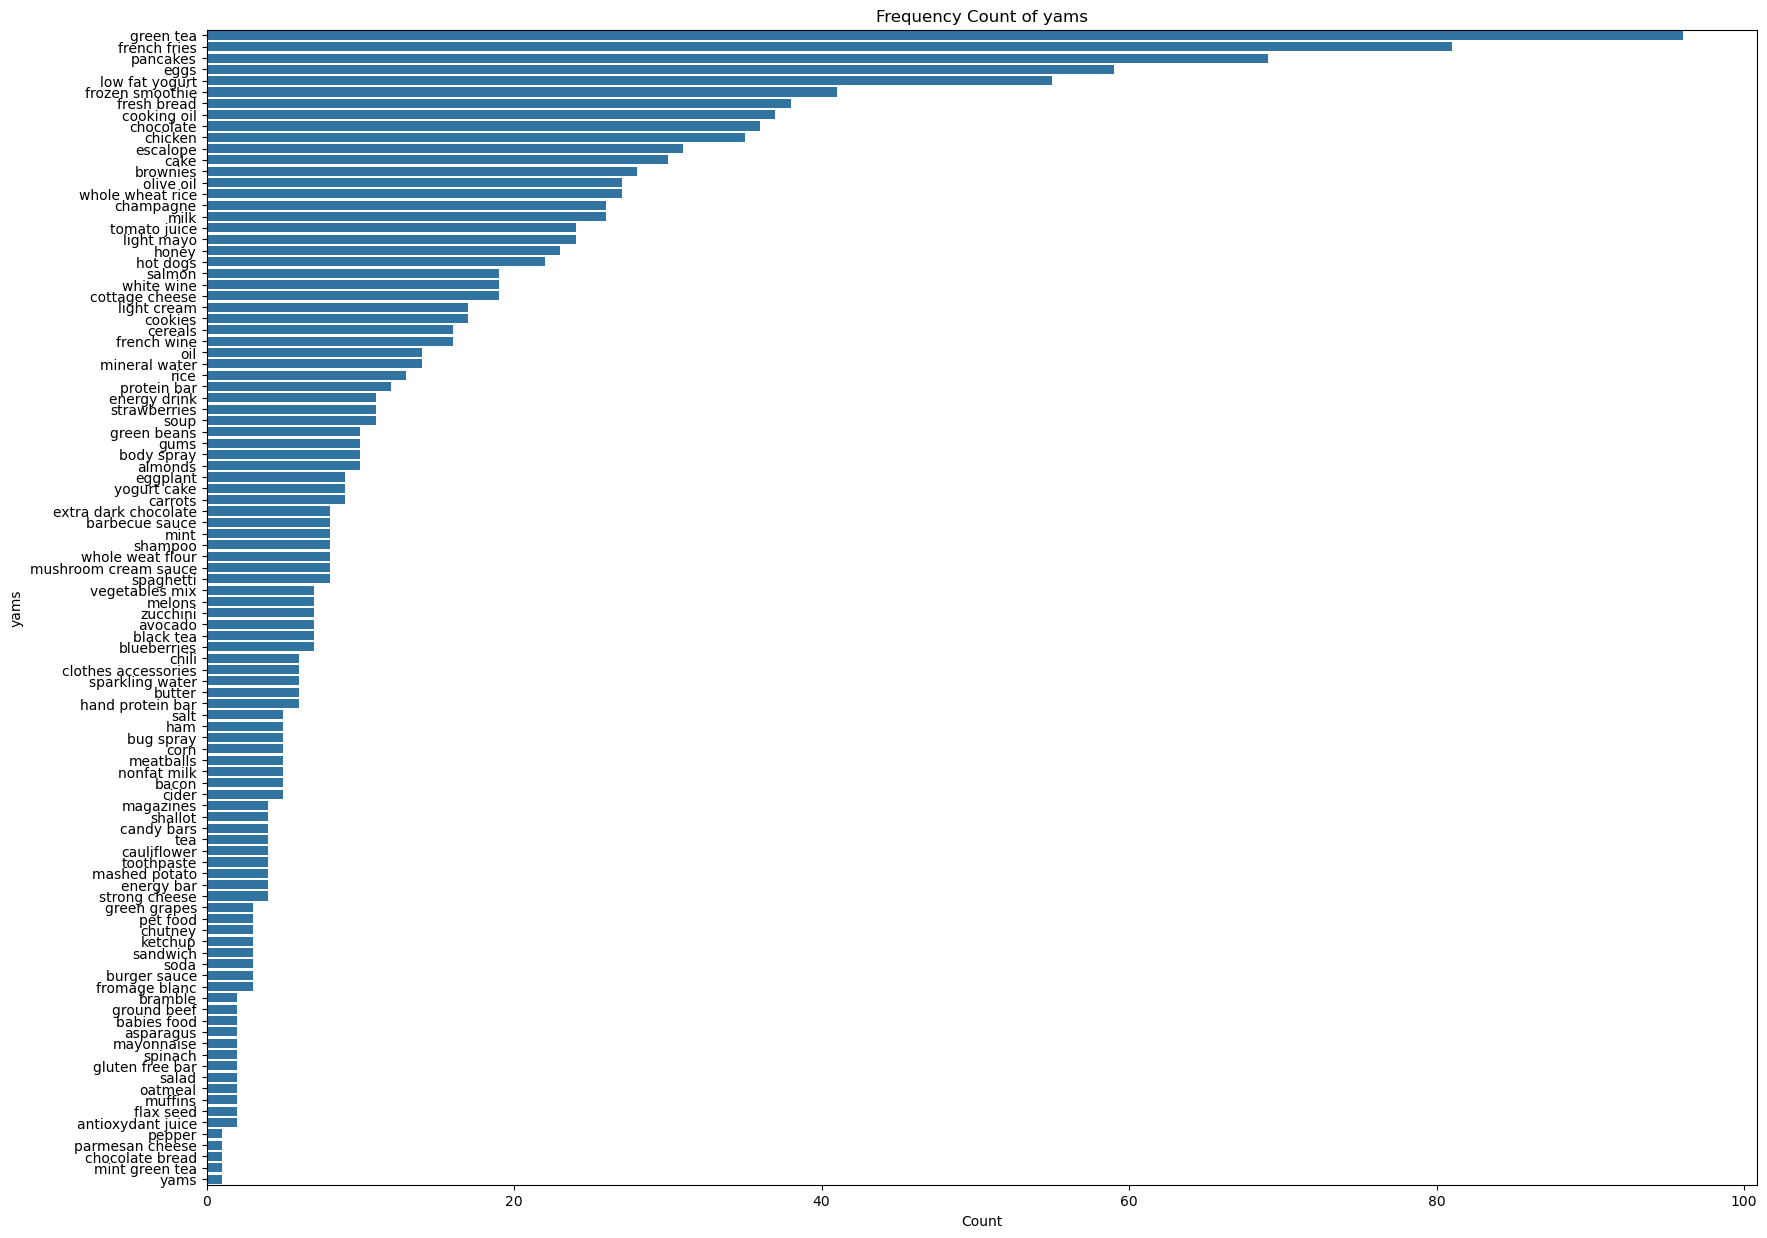

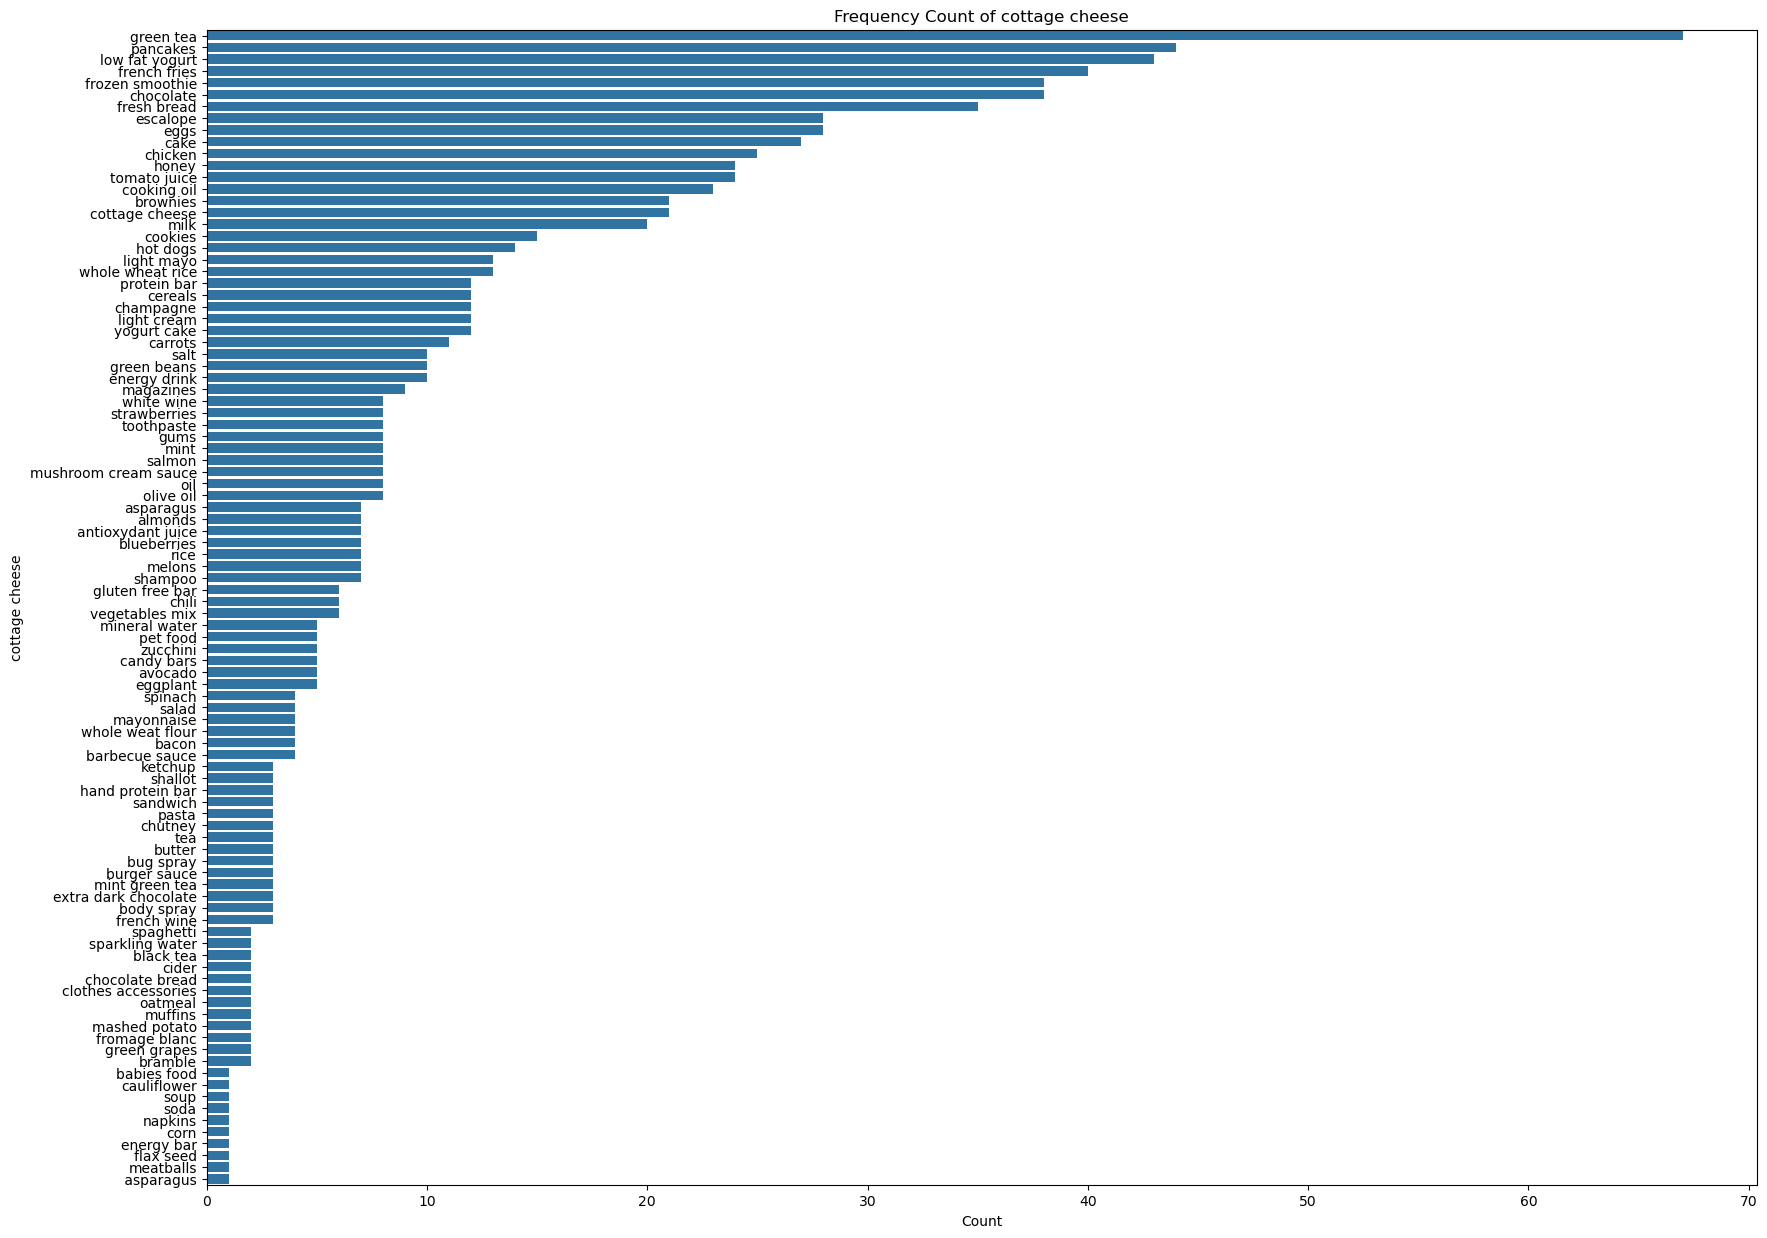

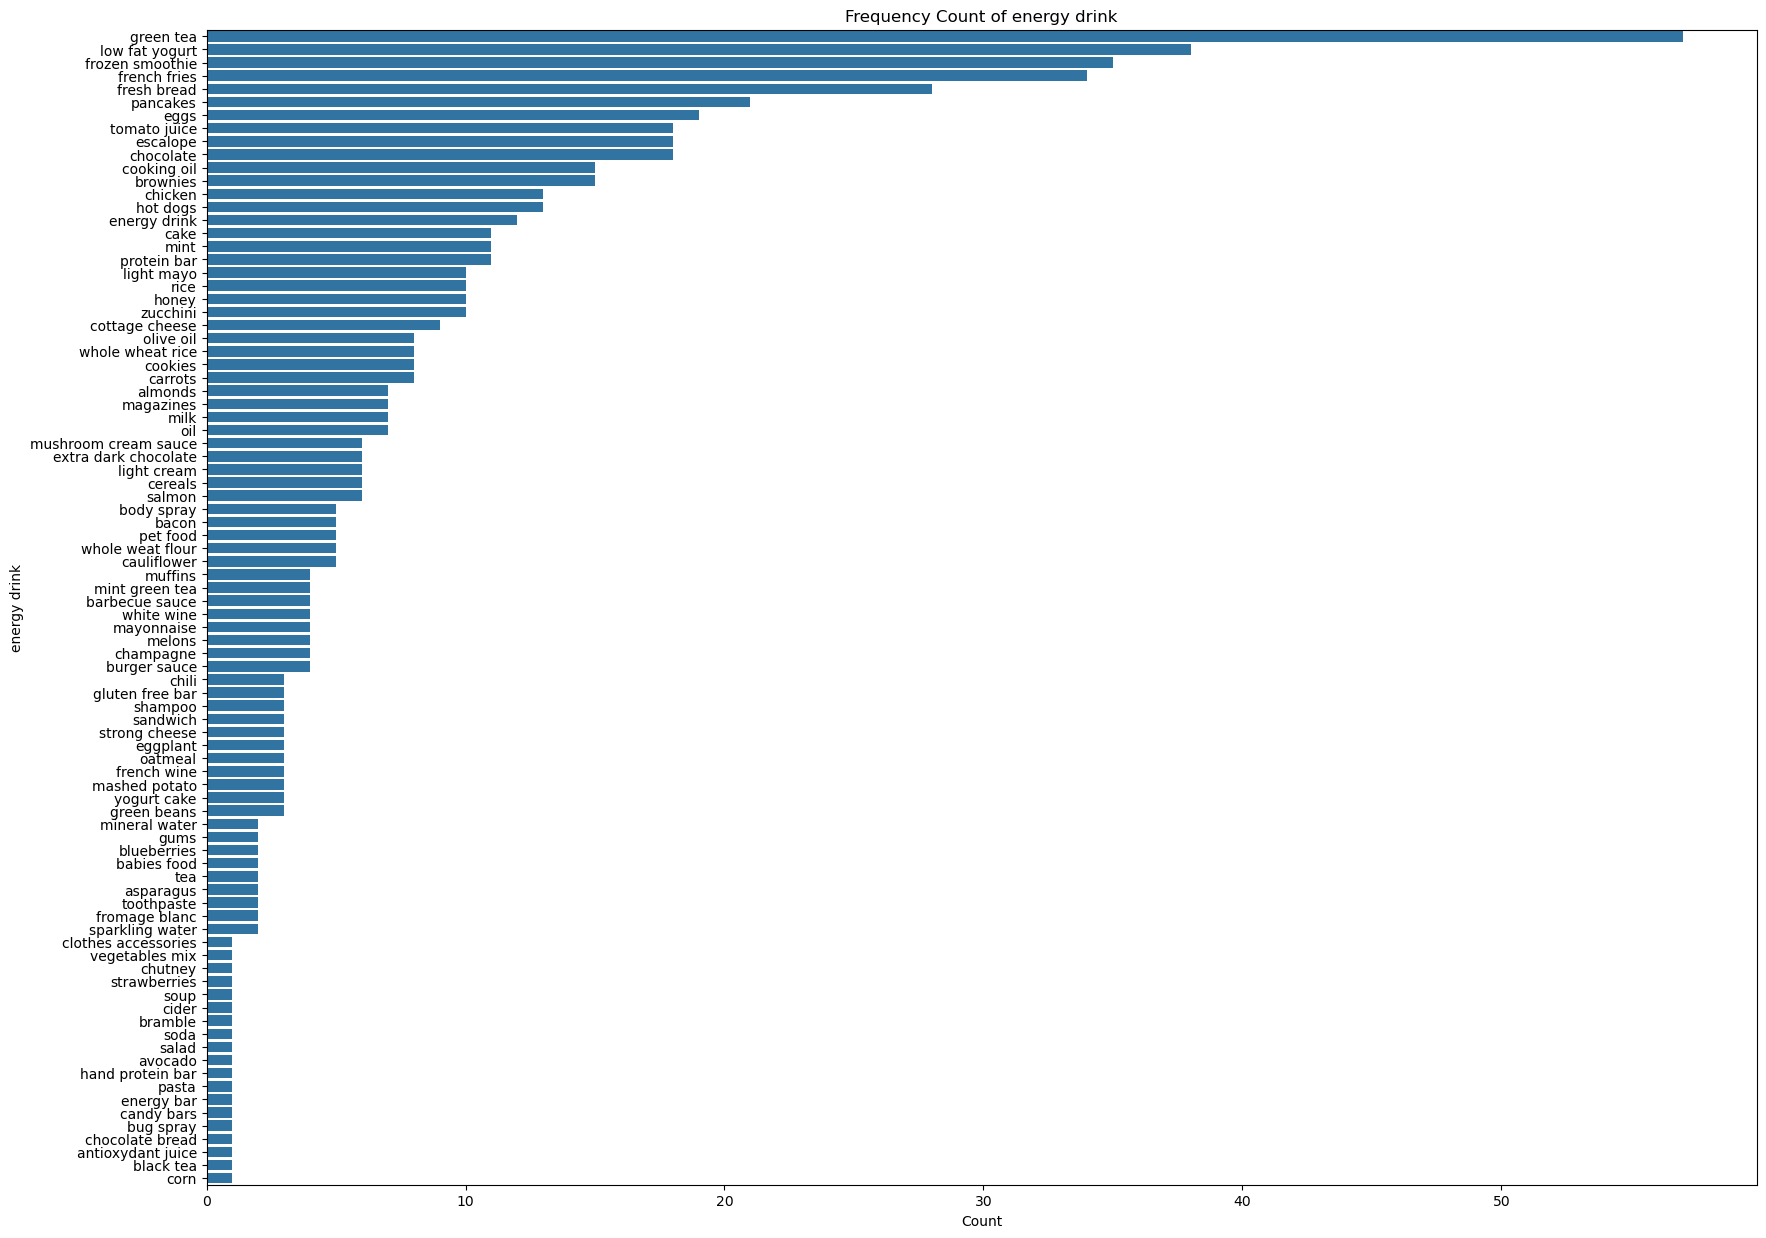

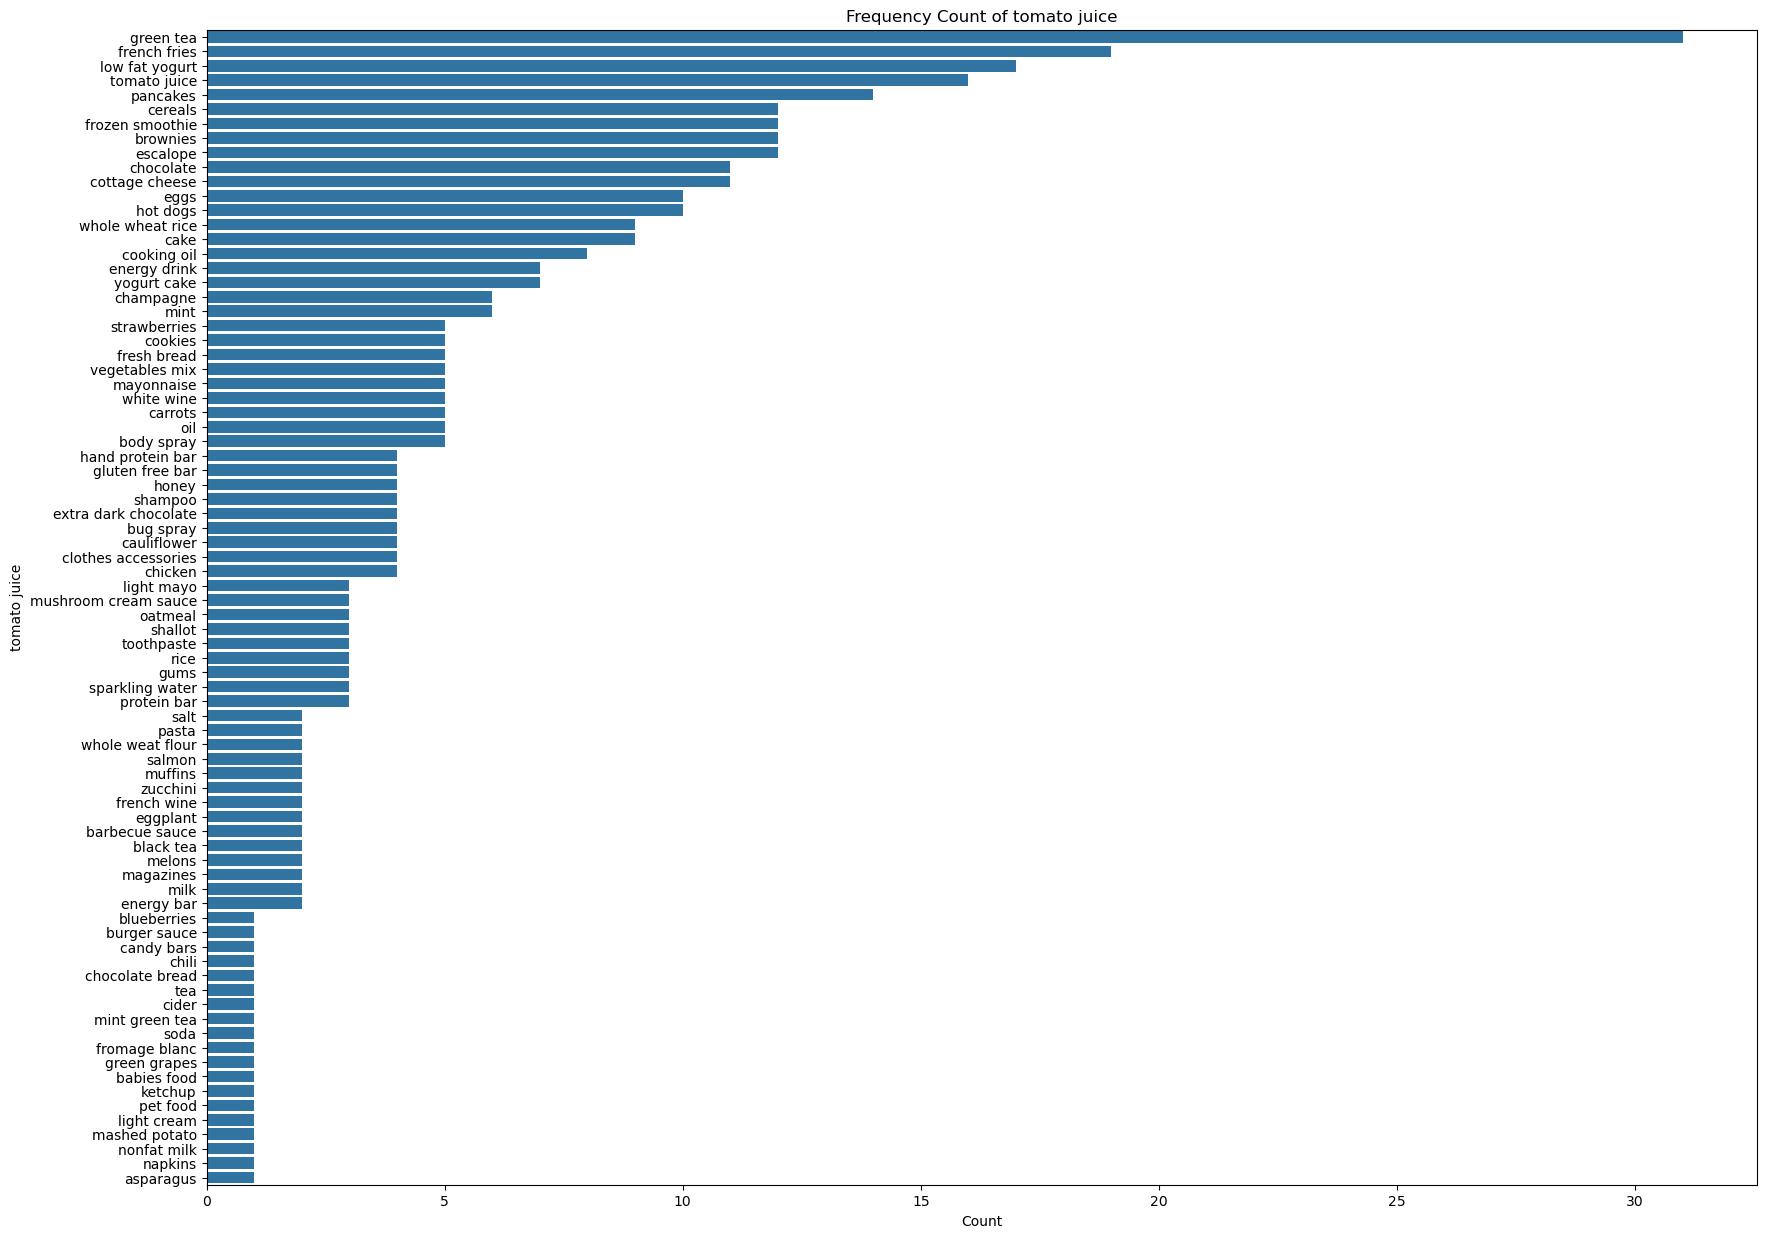

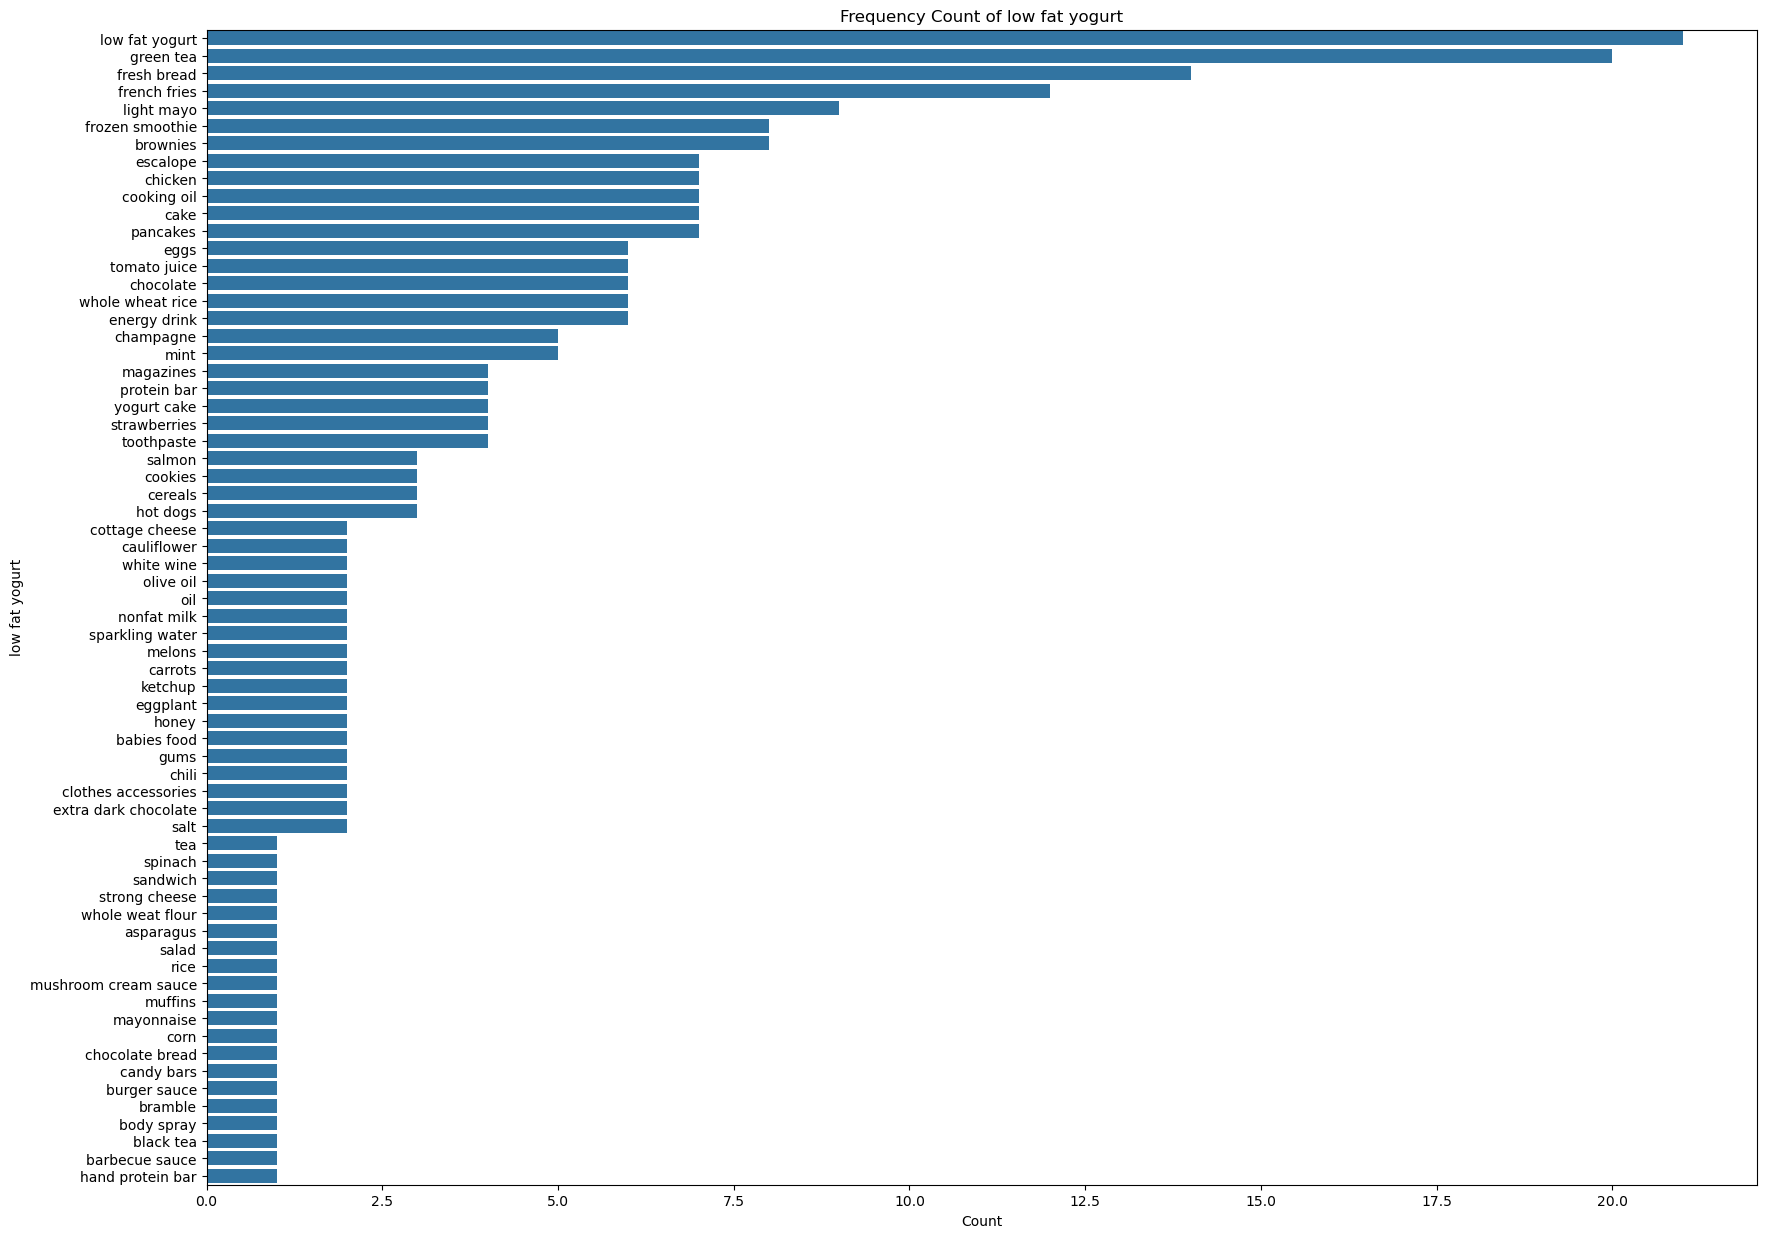

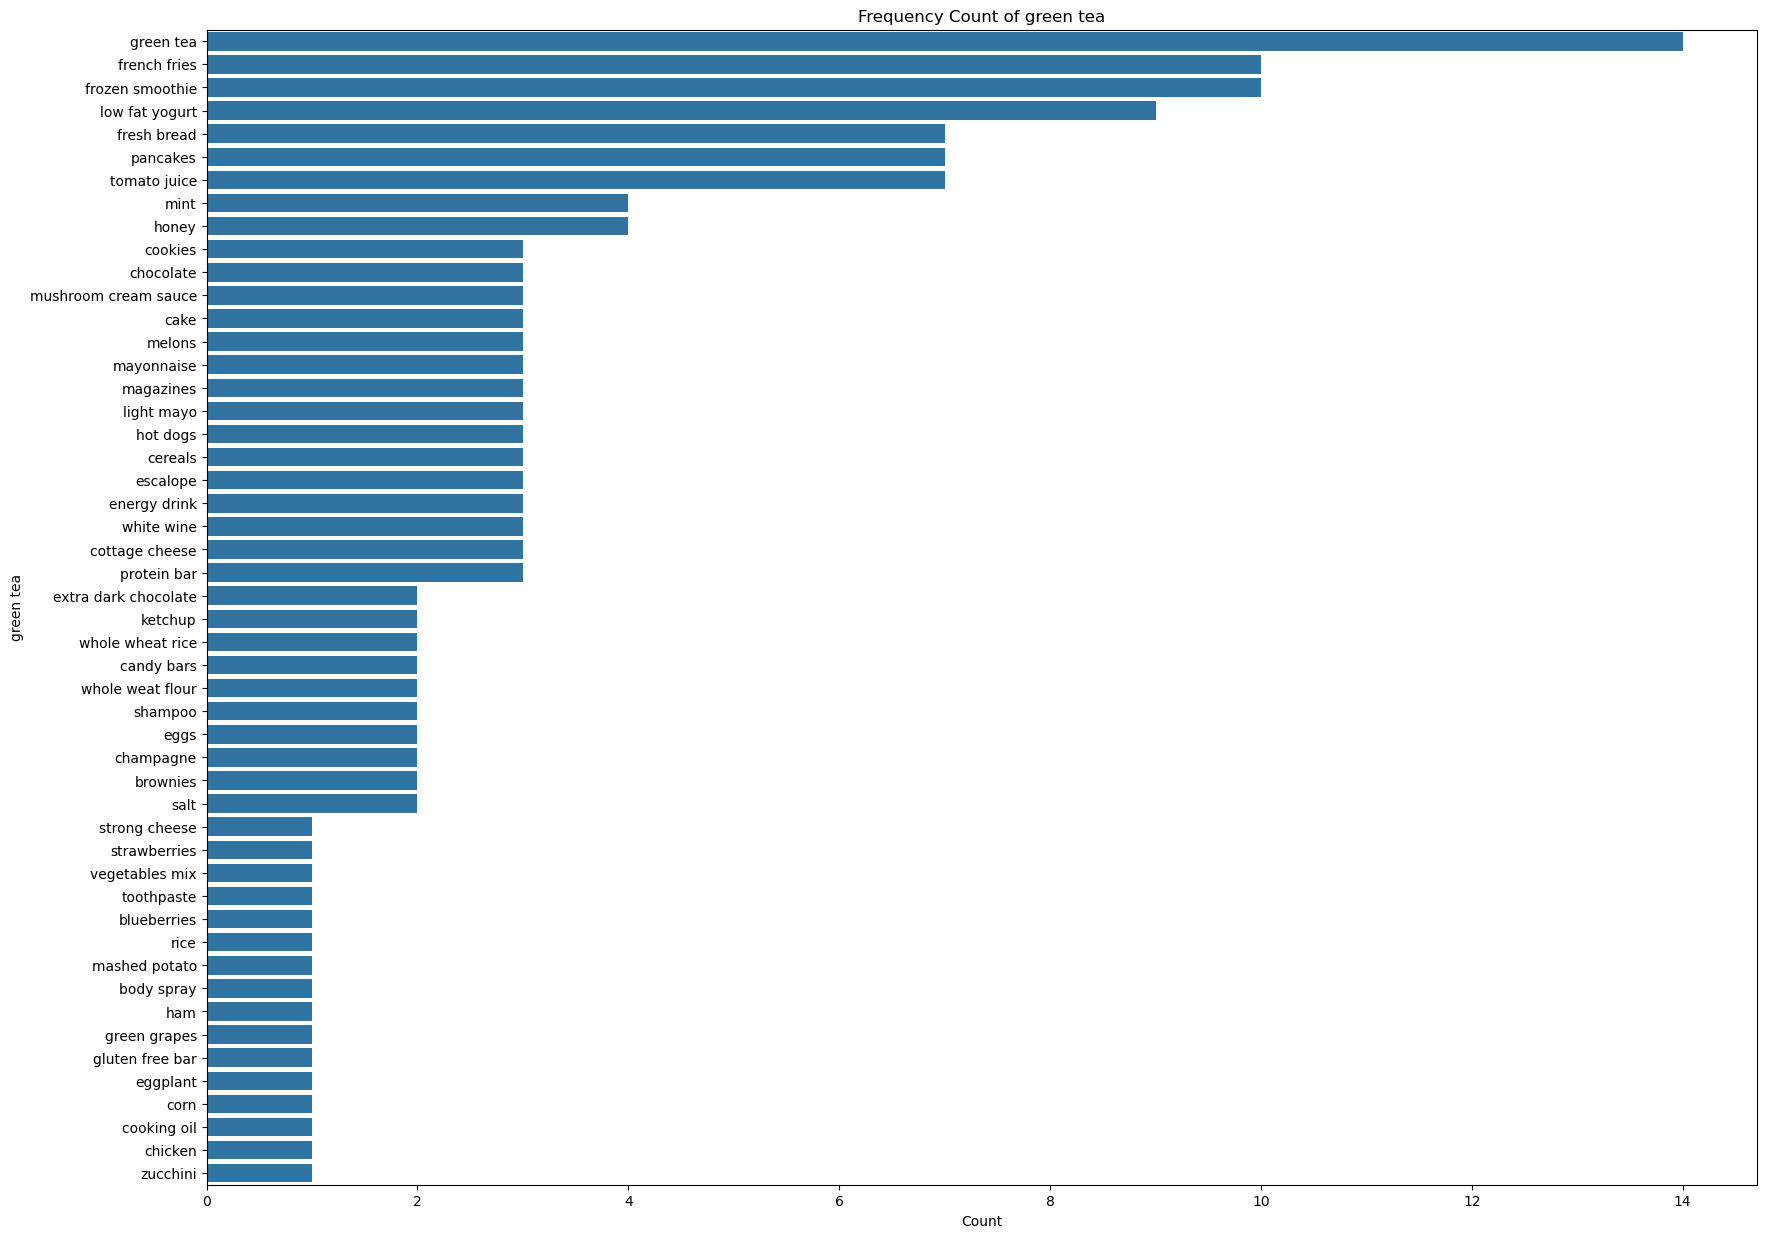

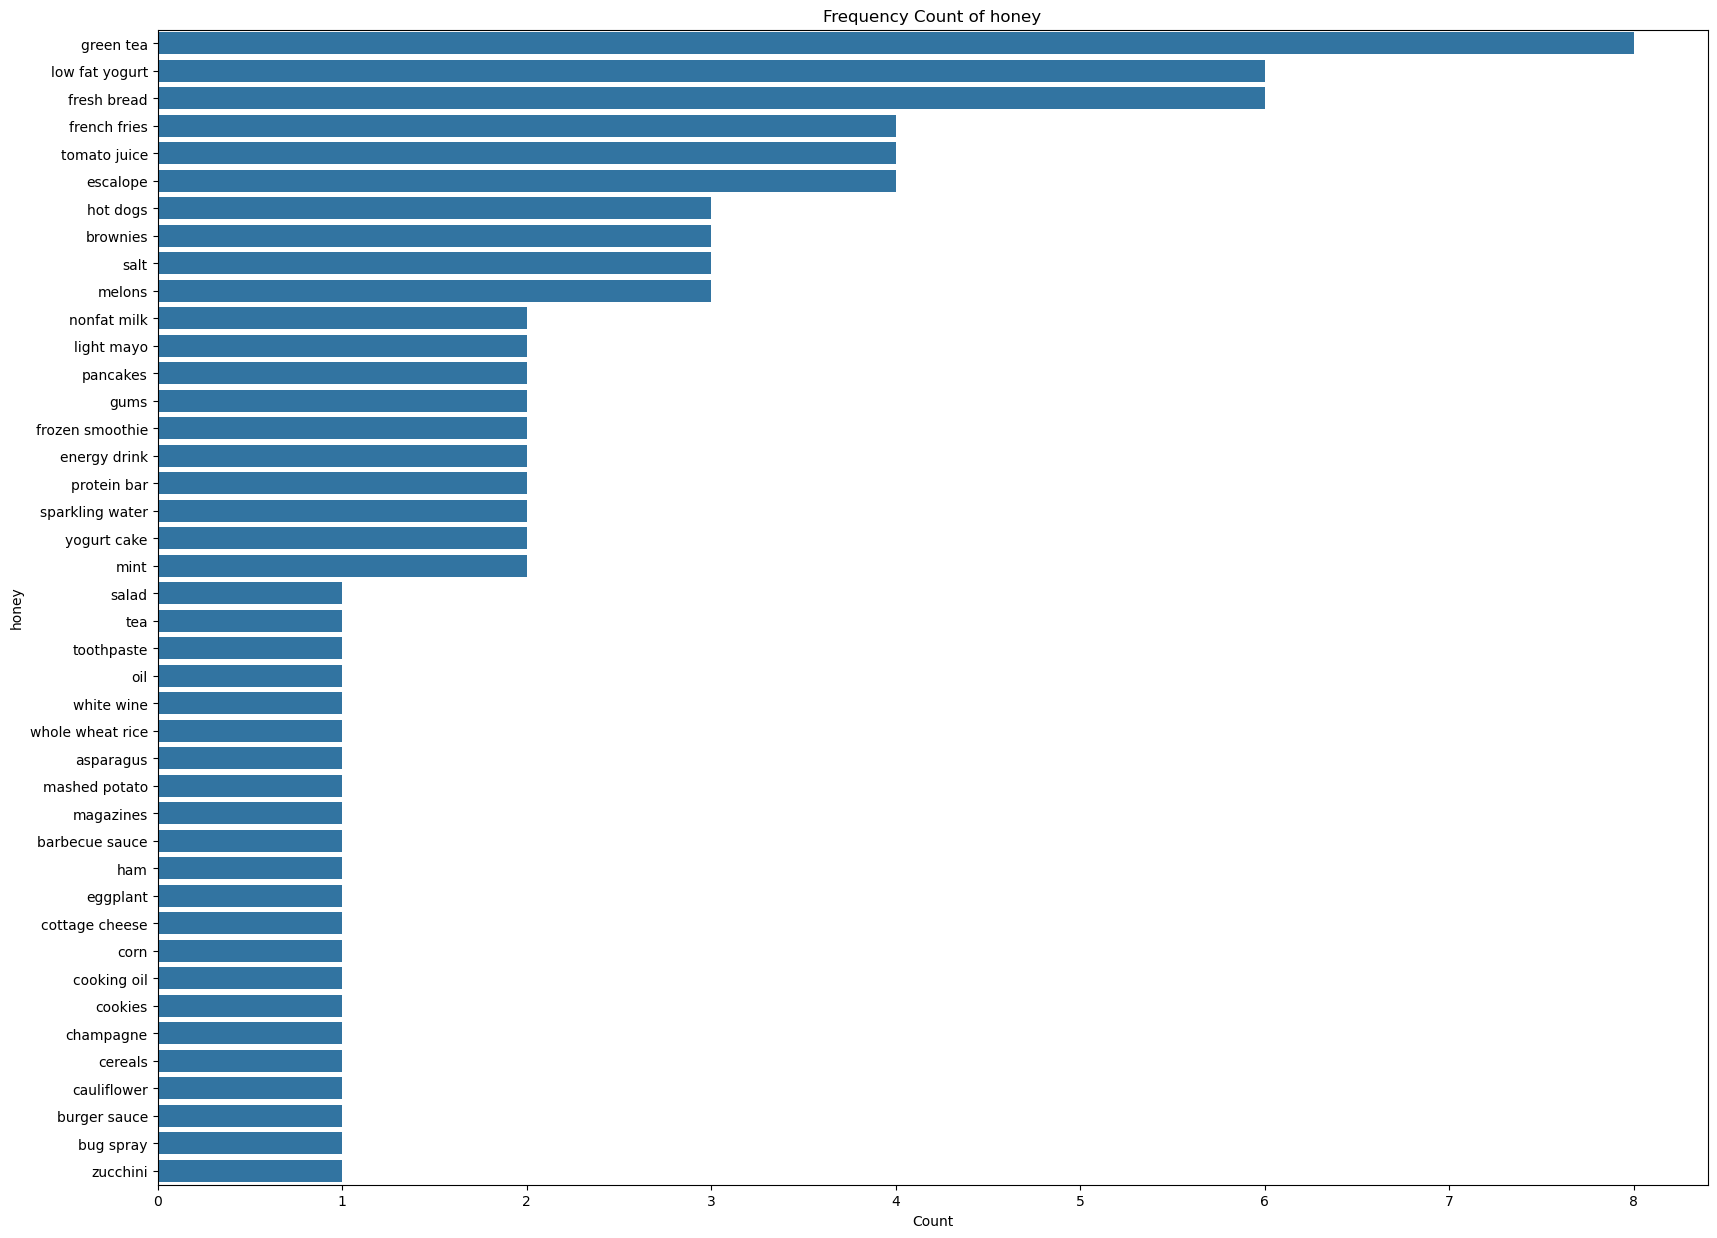

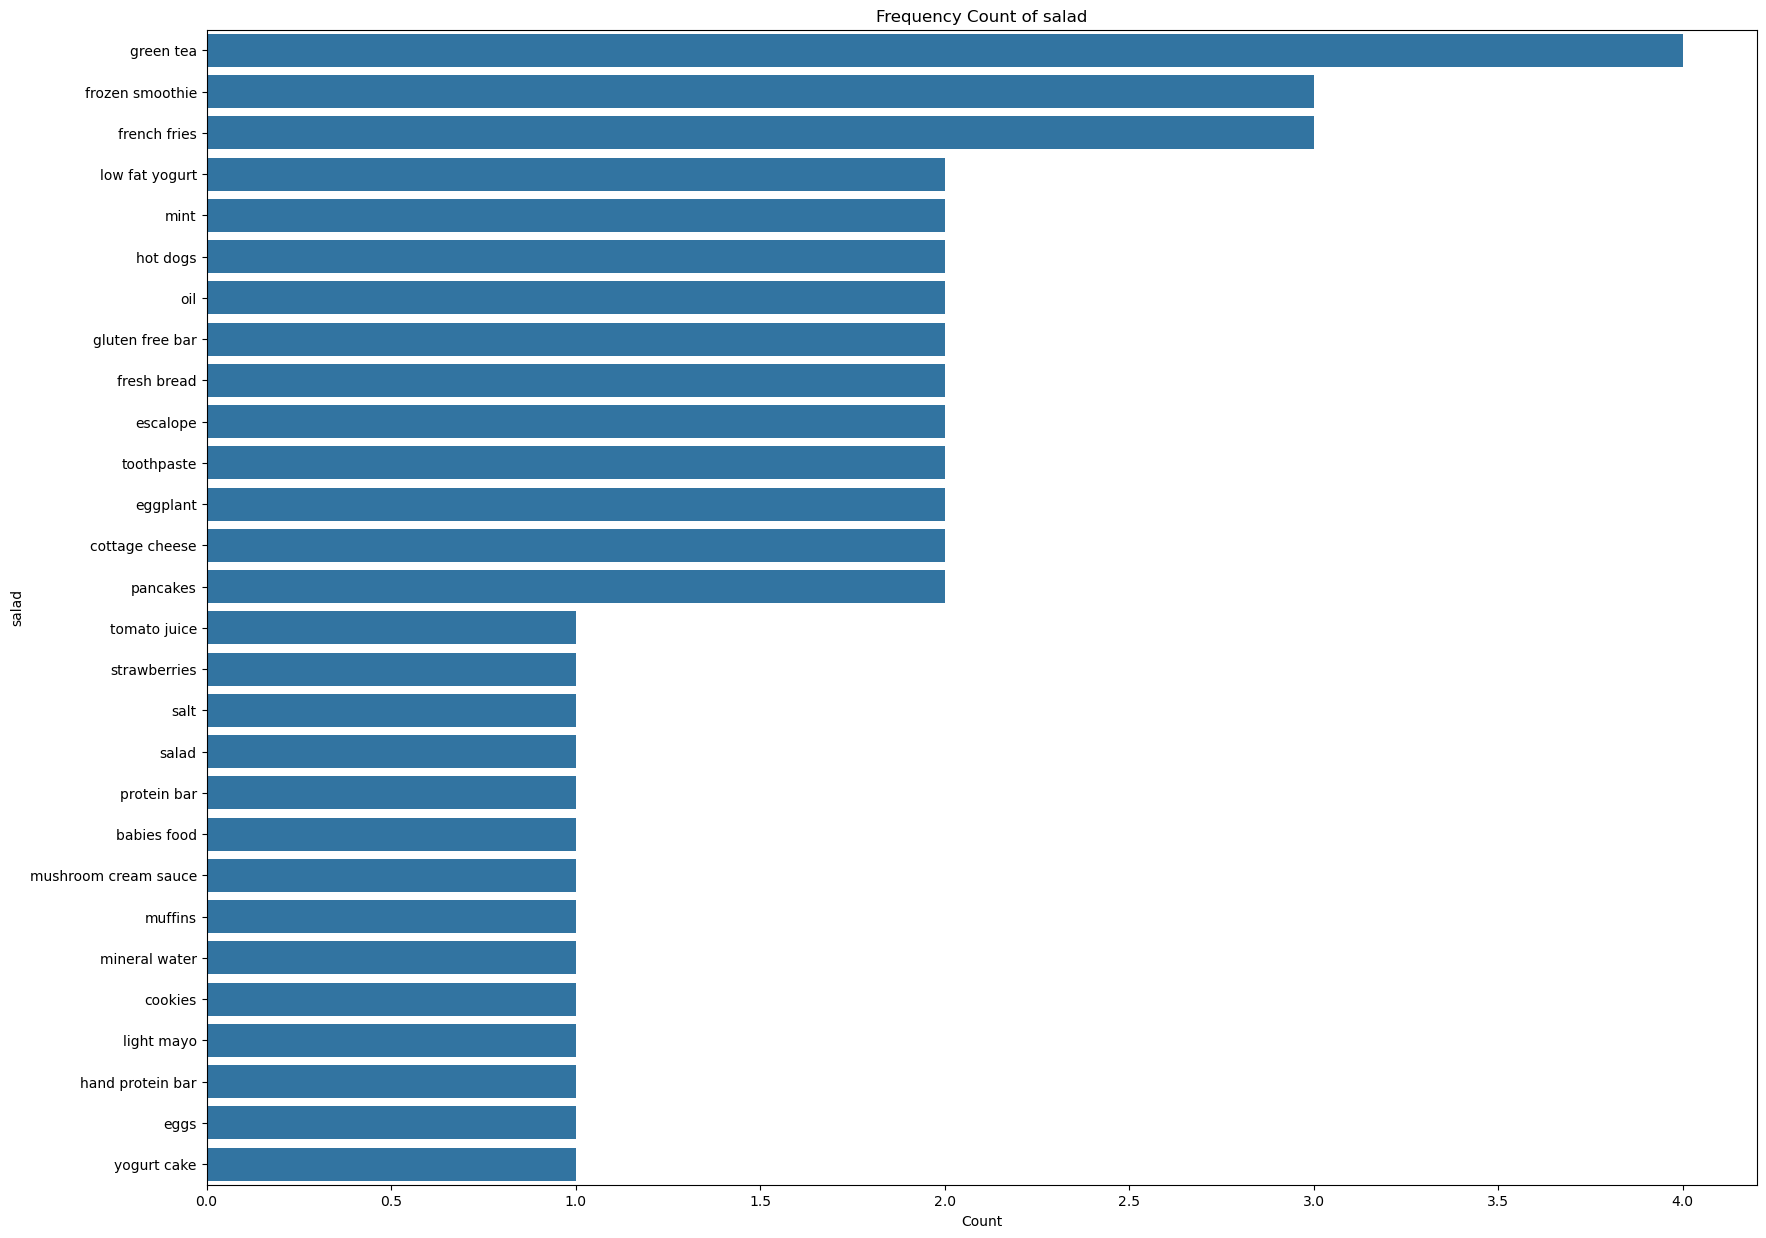

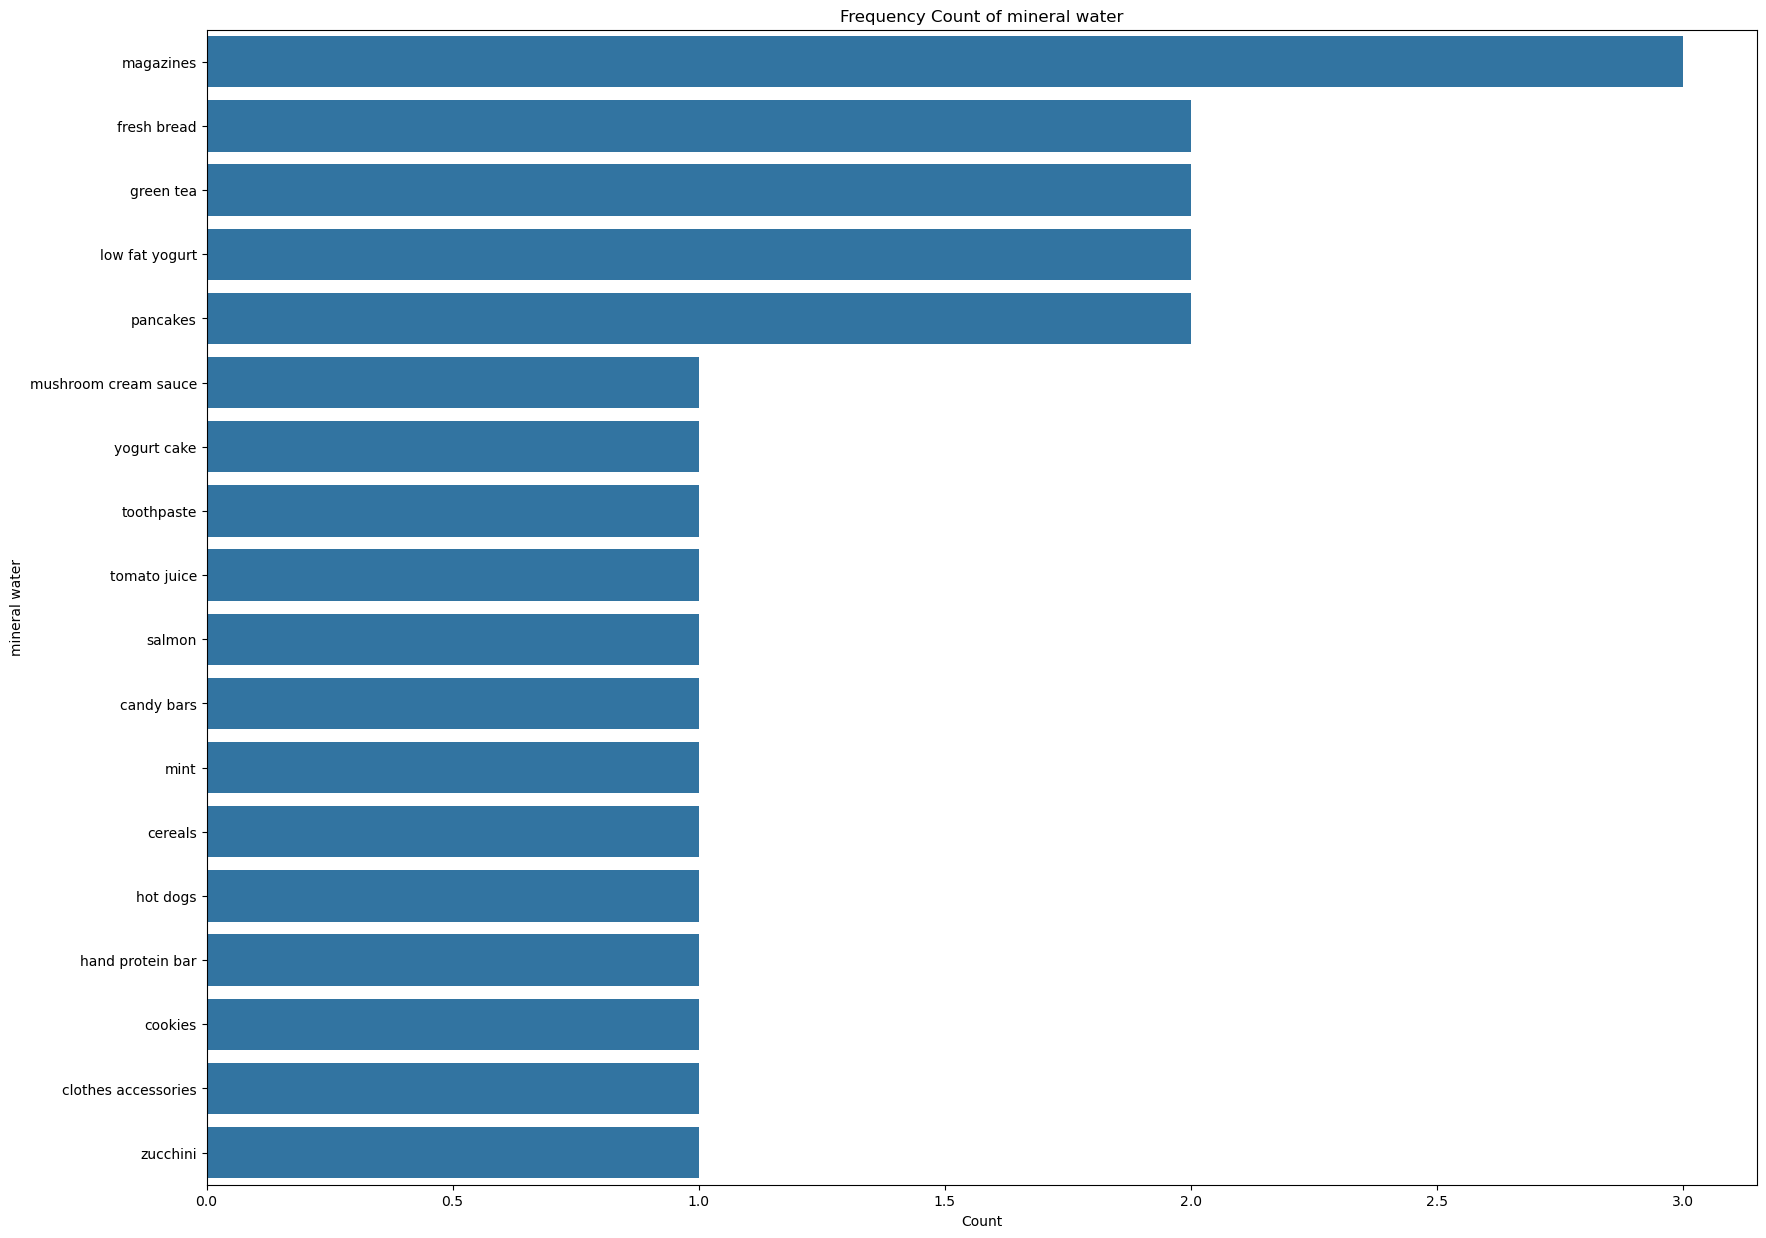

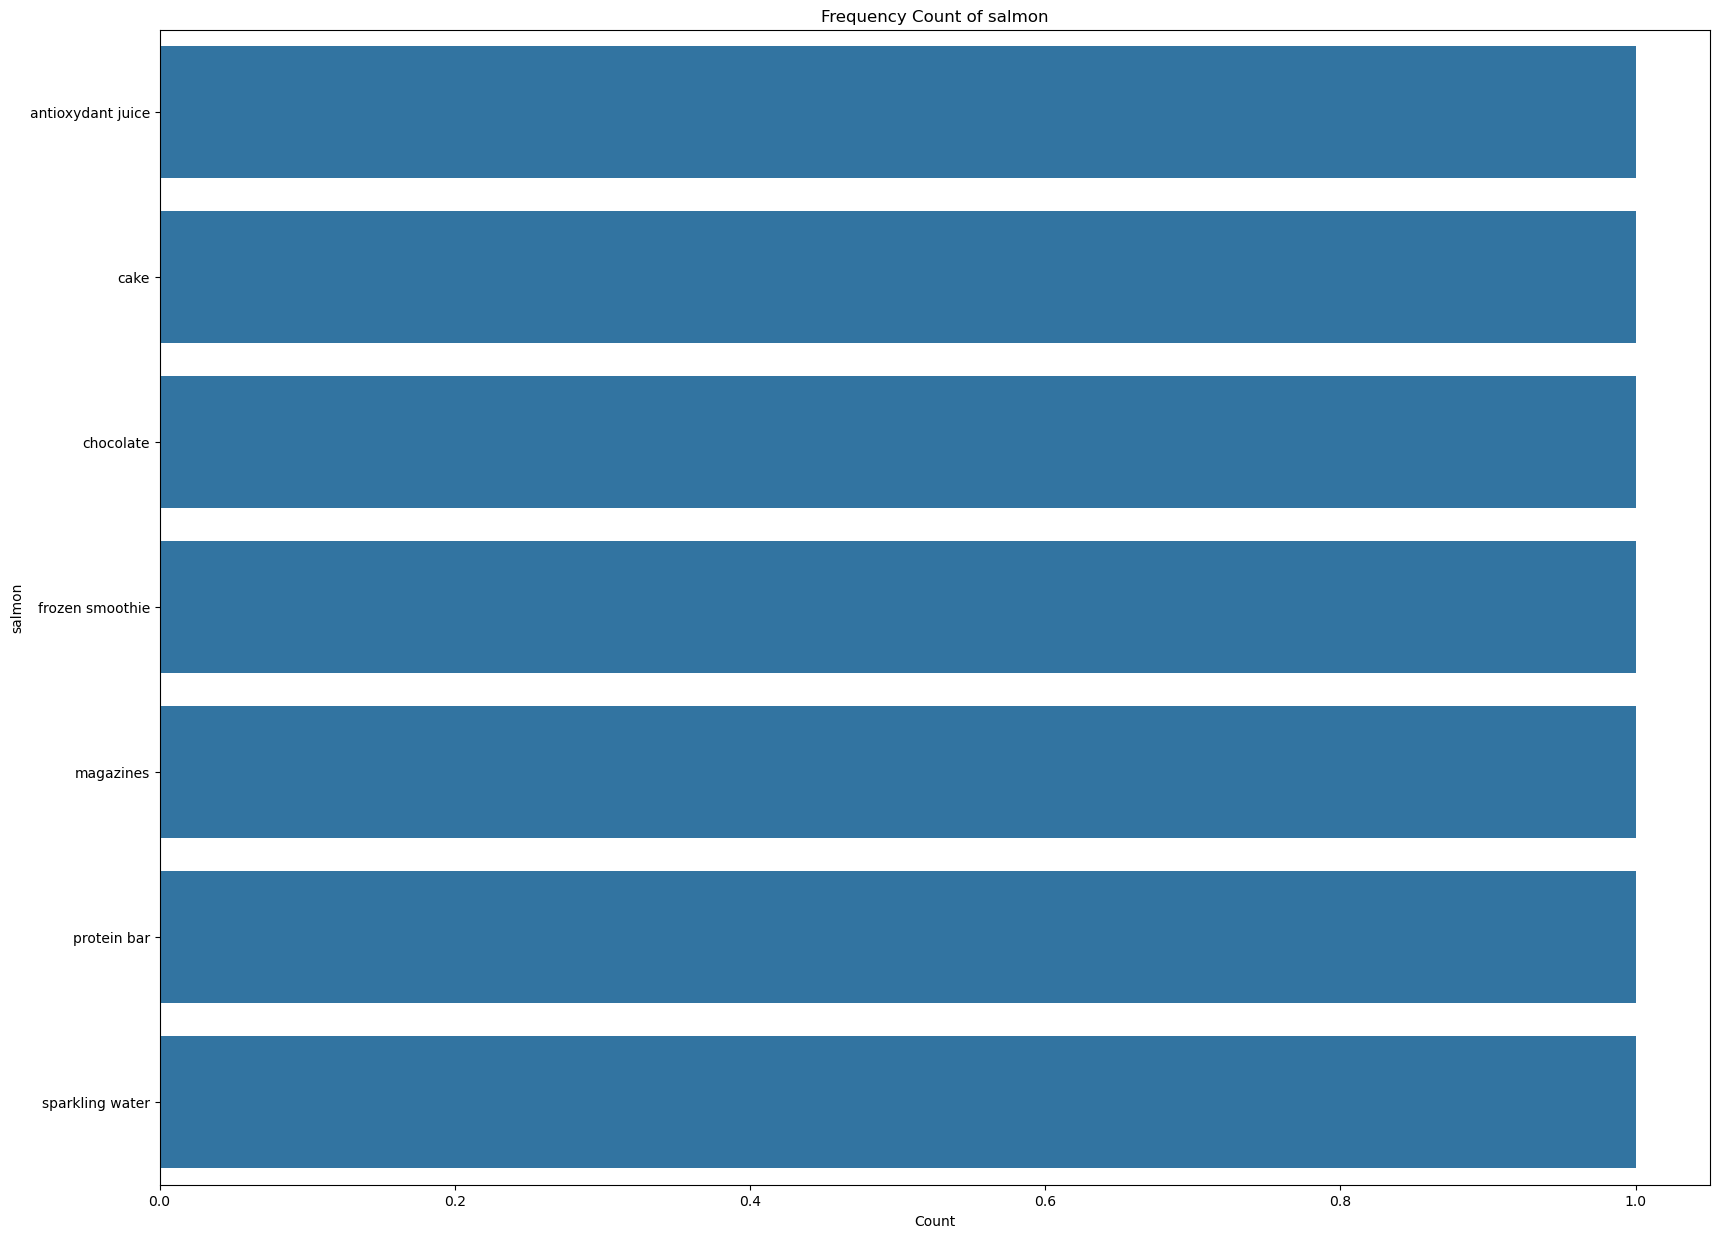

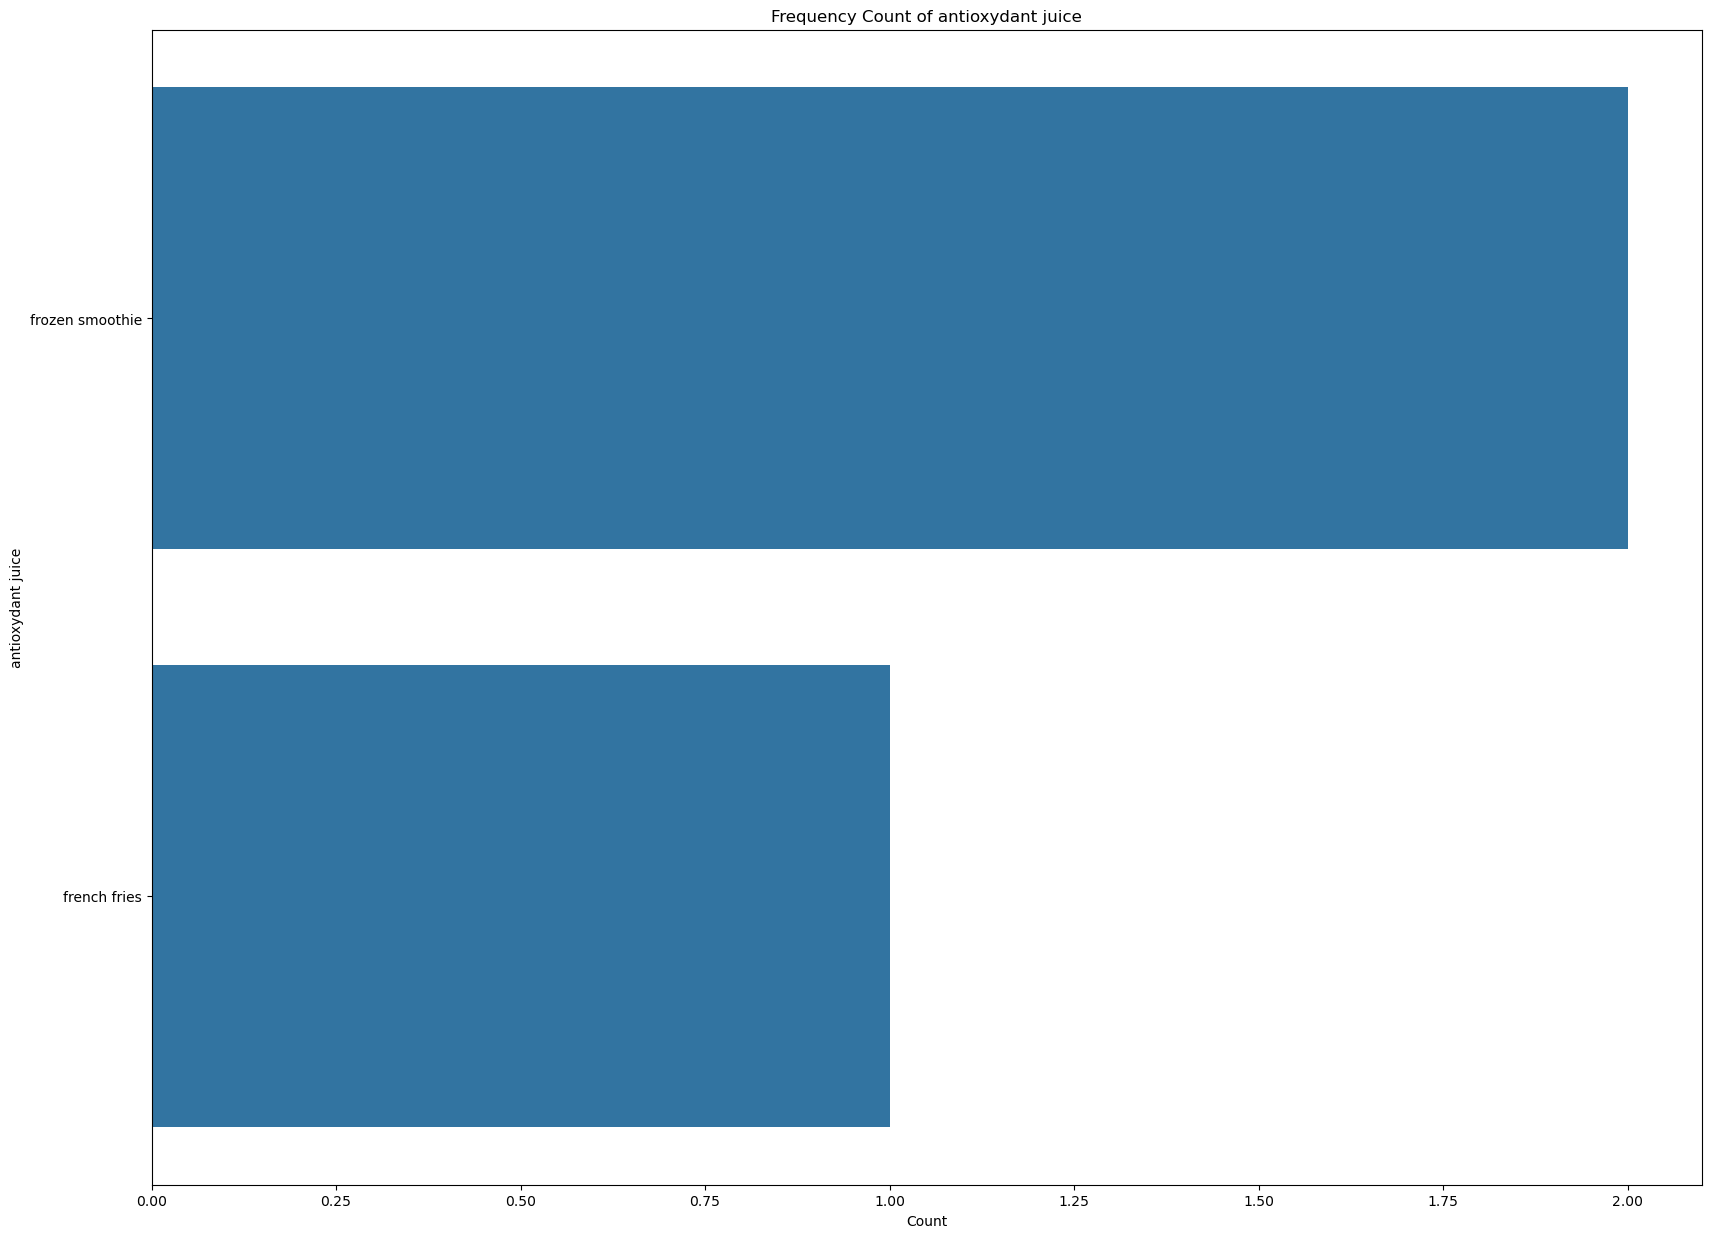

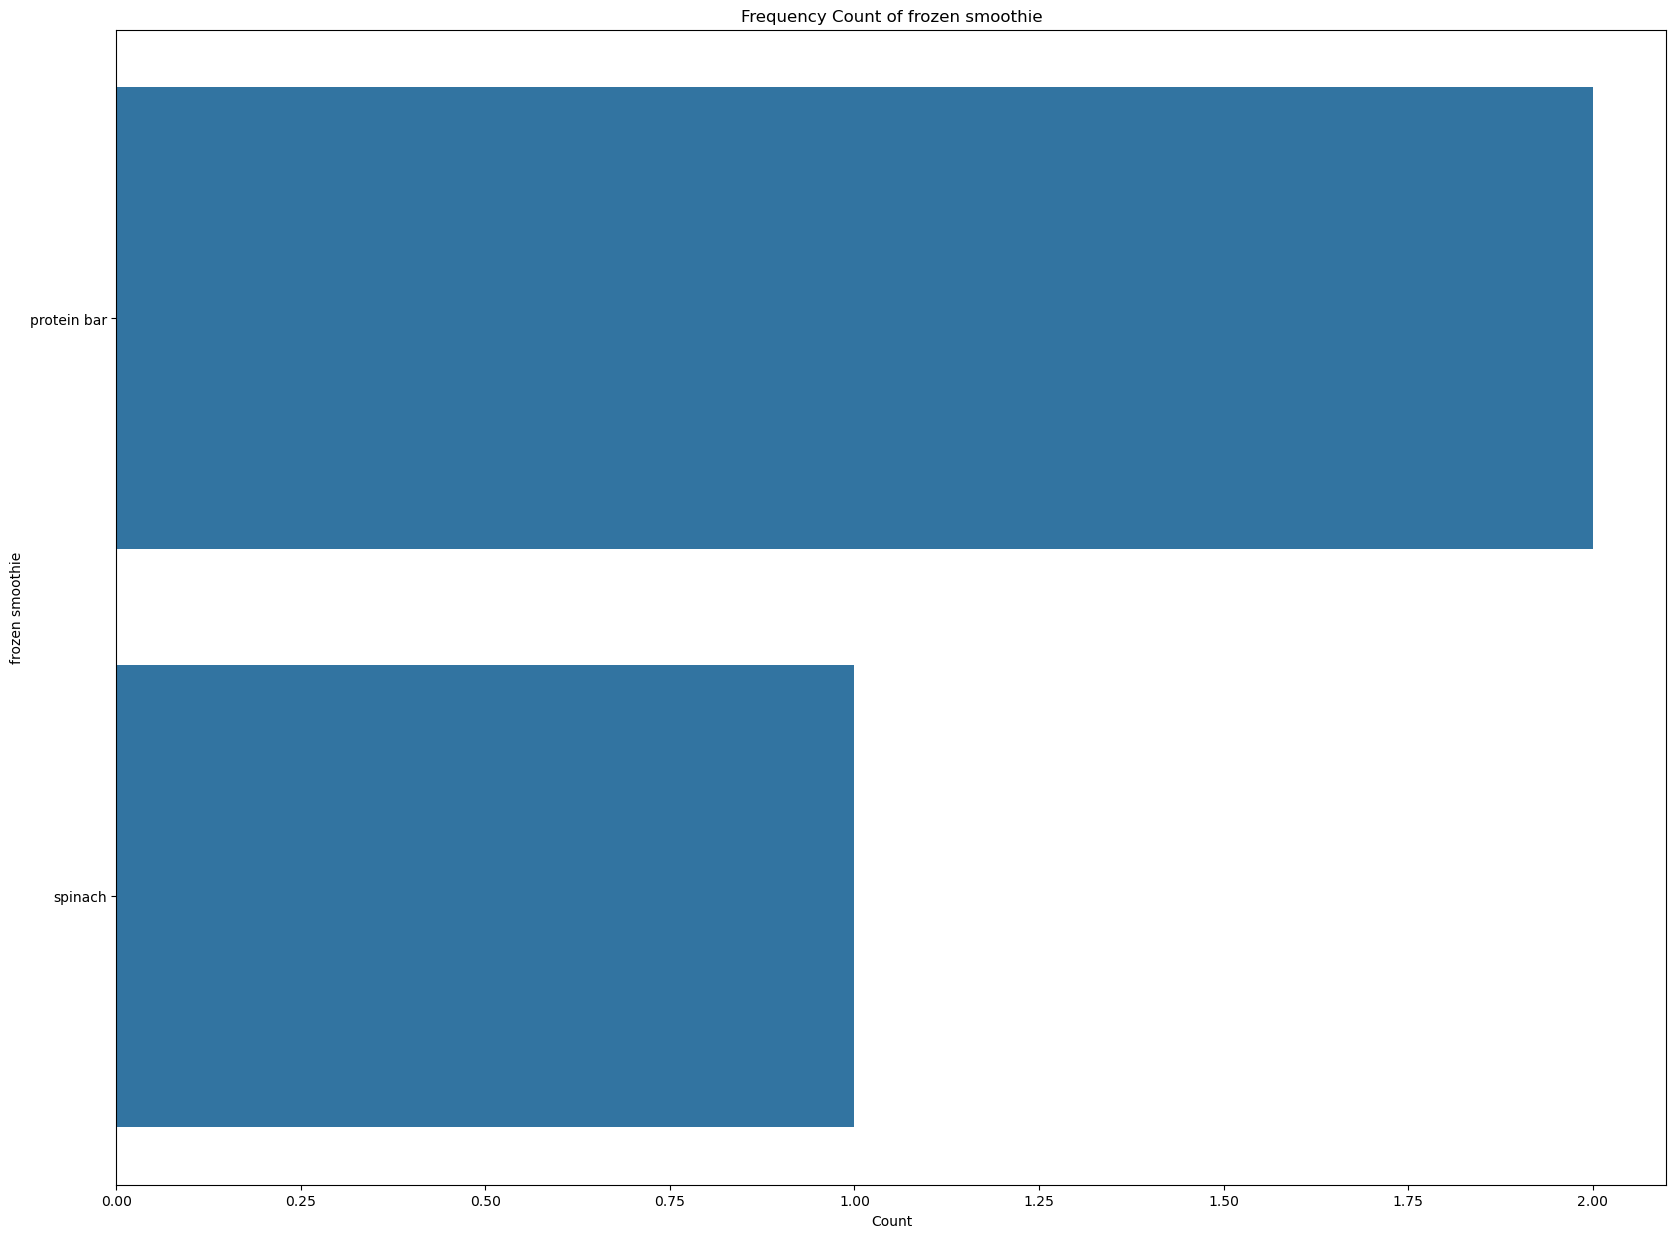

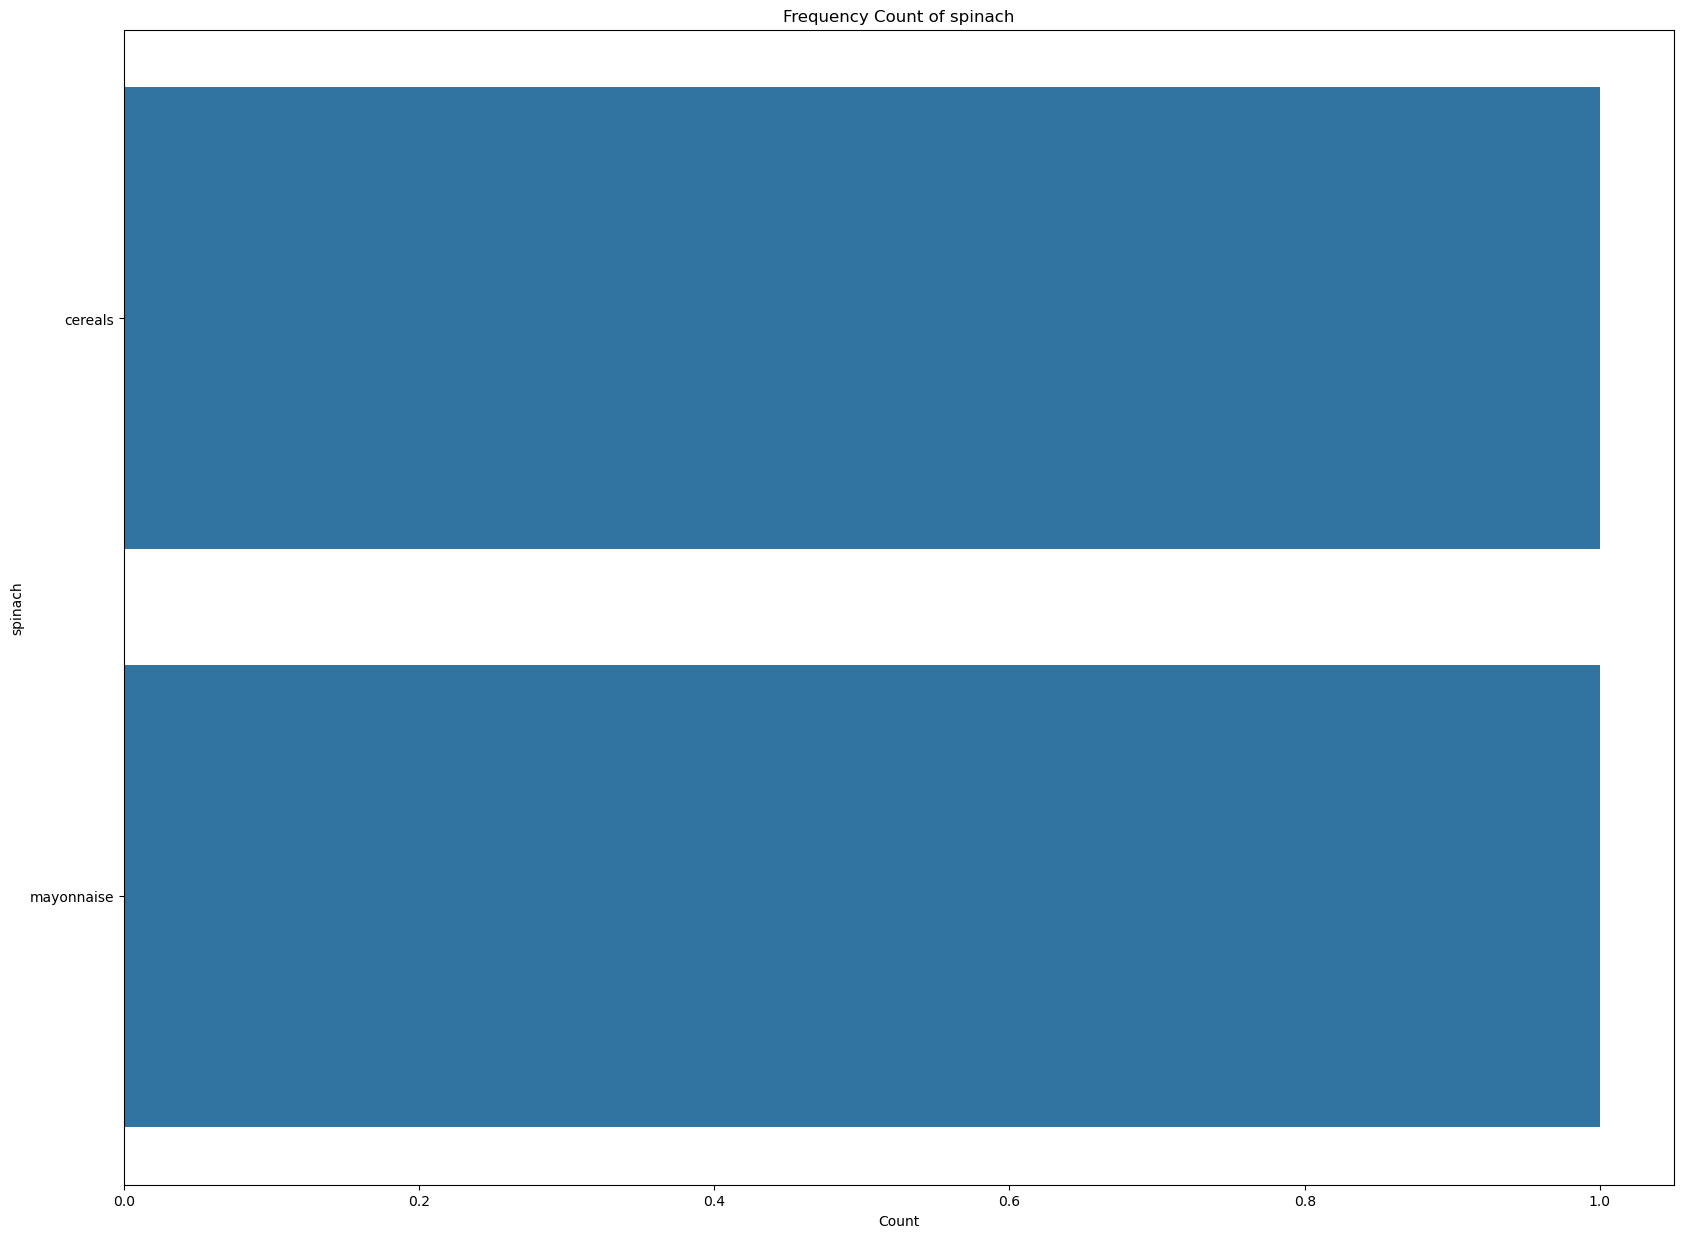

In [5]:
for column in EDA:

    plt.figure(figsize=(20, 15))
    sns.countplot(y=df[column], order=df[column].sort_values().value_counts().index)
    plt.title(f'Frequency Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [6]:
transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori to find frequent itemsets
frequent_itemsets = apriori(df_transformed, min_support=0.006, use_colnames=True)

# Generating association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Display the association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
      support                                      itemsets
0    0.020267                                     (almonds)
1    0.008800                           (antioxydant juice)
2    0.033200                                     (avocado)
3    0.008667                                       (bacon)
4    0.010800                              (barbecue sauce)
..        ...                                           ...
551  0.008533            (mineral water, spaghetti, shrimp)
552  0.007467              (mineral water, soup, spaghetti)
553  0.009333          (mineral water, spaghetti, tomatoes)
554  0.006400            (mineral water, spaghetti, turkey)
555  0.006267  (mineral water, spaghetti, whole wheat rice)

[556 rows x 2 columns]

Association Rules:
                            antecedents                        consequents  \
0                             (almonds)                        (chocolate)   
1                           (chocolate)                      

In [7]:
best_choice=rules[(rules['confidence']>0.5) & (rules['lift']>1)]
print('Best choice to buy items together')
print(best_choice[['antecedents','consequents','confidence','lift']])

Best choice to buy items together
                           antecedents      consequents  confidence      lift
722               (chicken, chocolate)  (mineral water)    0.518182  2.174798
843             (olive oil, chocolate)  (mineral water)    0.504065  2.115550
886                (cooking oil, eggs)  (mineral water)    0.545455  2.289261
936                (ground beef, eggs)  (mineral water)    0.506667  2.126469
1027  (frozen vegetables, ground beef)  (mineral water)    0.543307  2.280248
1033  (frozen vegetables, ground beef)      (spaghetti)    0.511811  2.939190
1051    (frozen vegetables, olive oil)  (mineral water)    0.576471  2.419434
1118               (milk, ground beef)  (mineral water)    0.503030  2.111207
1136           (pancakes, ground beef)  (mineral water)    0.513761  2.156246
1160             (ground beef, shrimp)      (spaghetti)    0.523256  3.004915
1190                      (soup, milk)  (mineral water)    0.561404  2.356198
1208                    (milk,

In [8]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','confidence','lift']])

Worst choice to buy items together
                             antecedents                         consequents  \
53                             (burgers)                    (low fat yogurt)   
52                      (low fat yogurt)                           (burgers)   
987                       (french fries)  (frozen vegetables, mineral water)   
982   (frozen vegetables, mineral water)                      (french fries)   
301                  (frozen vegetables)                          (escalope)   
...                                  ...                                 ...   
1104      (mineral water, herb & pepper)                       (ground beef)   
1115                       (ground beef)          (spaghetti, herb & pepper)   
1110          (spaghetti, herb & pepper)                       (ground beef)   
599                  (whole wheat pasta)                         (olive oil)   
598                          (olive oil)                 (whole wheat pasta)   

    

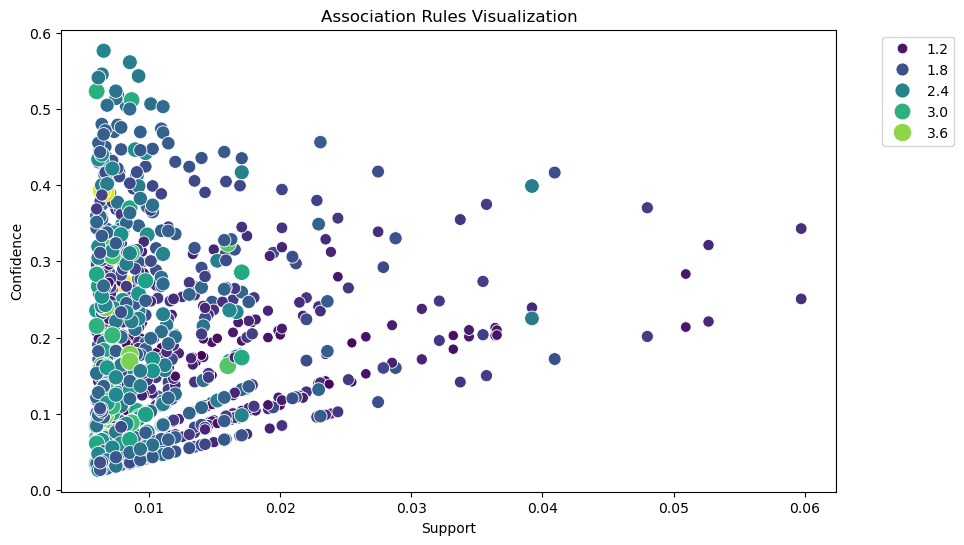

In [9]:
# Visualizing association rules using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(50, 200))
plt.title("Association Rules Visualization")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

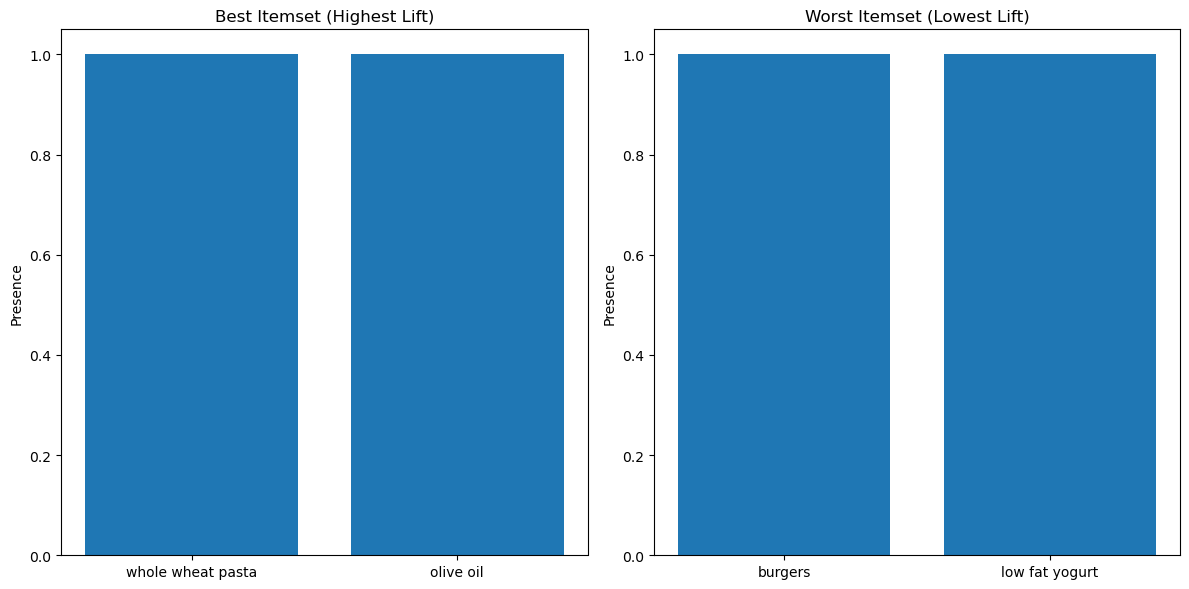

In [10]:
best_choice = rules.sort_values(by='lift', ascending=False)
worst_choice = rules.sort_values(by='lift', ascending=True)

# Extract the top and bottom itemsets
best_antecedents = best_choice['antecedents'].iloc[0]
best_consequents = best_choice['consequents'].iloc[0]
worst_antecedents = worst_choice['antecedents'].iloc[0]
worst_consequents = worst_choice['consequents'].iloc[0]

# Create bar charts for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Best itemset
axes[0].bar(list(best_antecedents) + list(best_consequents), [1] * (len(best_antecedents) + len(best_consequents)))
axes[0].set_title('Best Itemset (Highest Lift)')
axes[0].set_ylabel('Presence')

# Worst itemset
axes[1].bar(list(worst_antecedents) + list(worst_consequents), [1] * (len(worst_antecedents) + len(worst_consequents)))
axes[1].set_title('Worst Itemset (Lowest Lift)')
axes[1].set_ylabel('Presence')

plt.tight_layout()
plt.show()